In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk.corpus as Corpus
from nltk import corpus
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/hotel_reviews.xlsx")

In [ ]:
df.head()

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN


In [ ]:
df1=df.iloc[:,:-1]

In [ ]:
df1.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
df1.shape

(20491, 2)

In [ ]:
#columns
df.columns


Index(['Review', 'Rating', '@'], dtype='object')

In [ ]:
#unique values
df.nunique()


Review    20491
Rating        5
@             0
dtype: int64

In [ ]:
df1.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df1['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.dtypes

Review    object
Rating     int64
dtype: object

In [ ]:
df1['Rating']

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

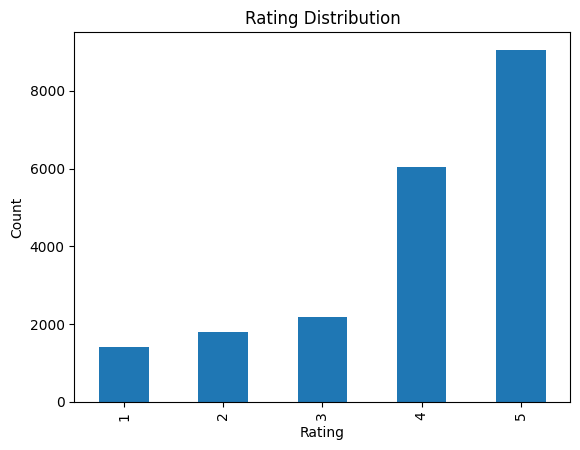

In [ ]:
df1['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [ ]:
label= LabelEncoder()
df1['Rating'] = label.fit_transform(df1['Rating'])

In [ ]:
df1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,3
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,2
3,"unique, great stay, wonderful time hotel monac...",4
4,"great stay great stay, went seahawk game aweso...",4
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",4
20487,great location price view hotel great quick pl...,3
20488,"ok just looks nice modern outside, desk staff ...",1
20489,hotel theft ruined vacation hotel opened sept ...,0


In [ ]:
#Count of null values#
count=df.isnull().sum().sort_values(ascending=True)
percentage=((df.isnull().sum()/len(df)*100))
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])



In [ ]:
x=df1['Review']
y=df1['Rating']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<Axes: xlabel='Rating', ylabel='count'>

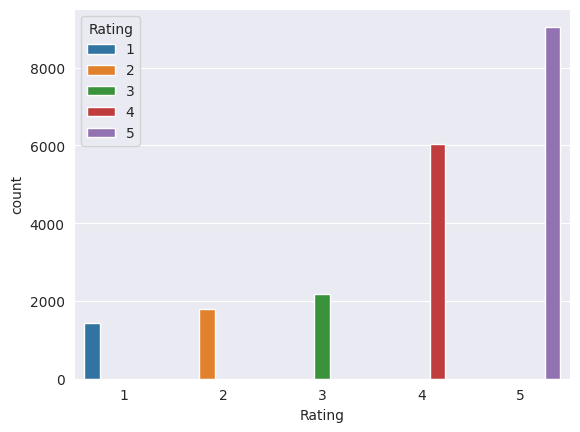

In [ ]:
#Rating Count
sns.set_style("darkgrid")
sns.countplot(x="Rating",hue="Rating",data=df)



5    44.19
4    29.47
3    10.66
2     8.75
1     6.93
Name: Rating, dtype: float64


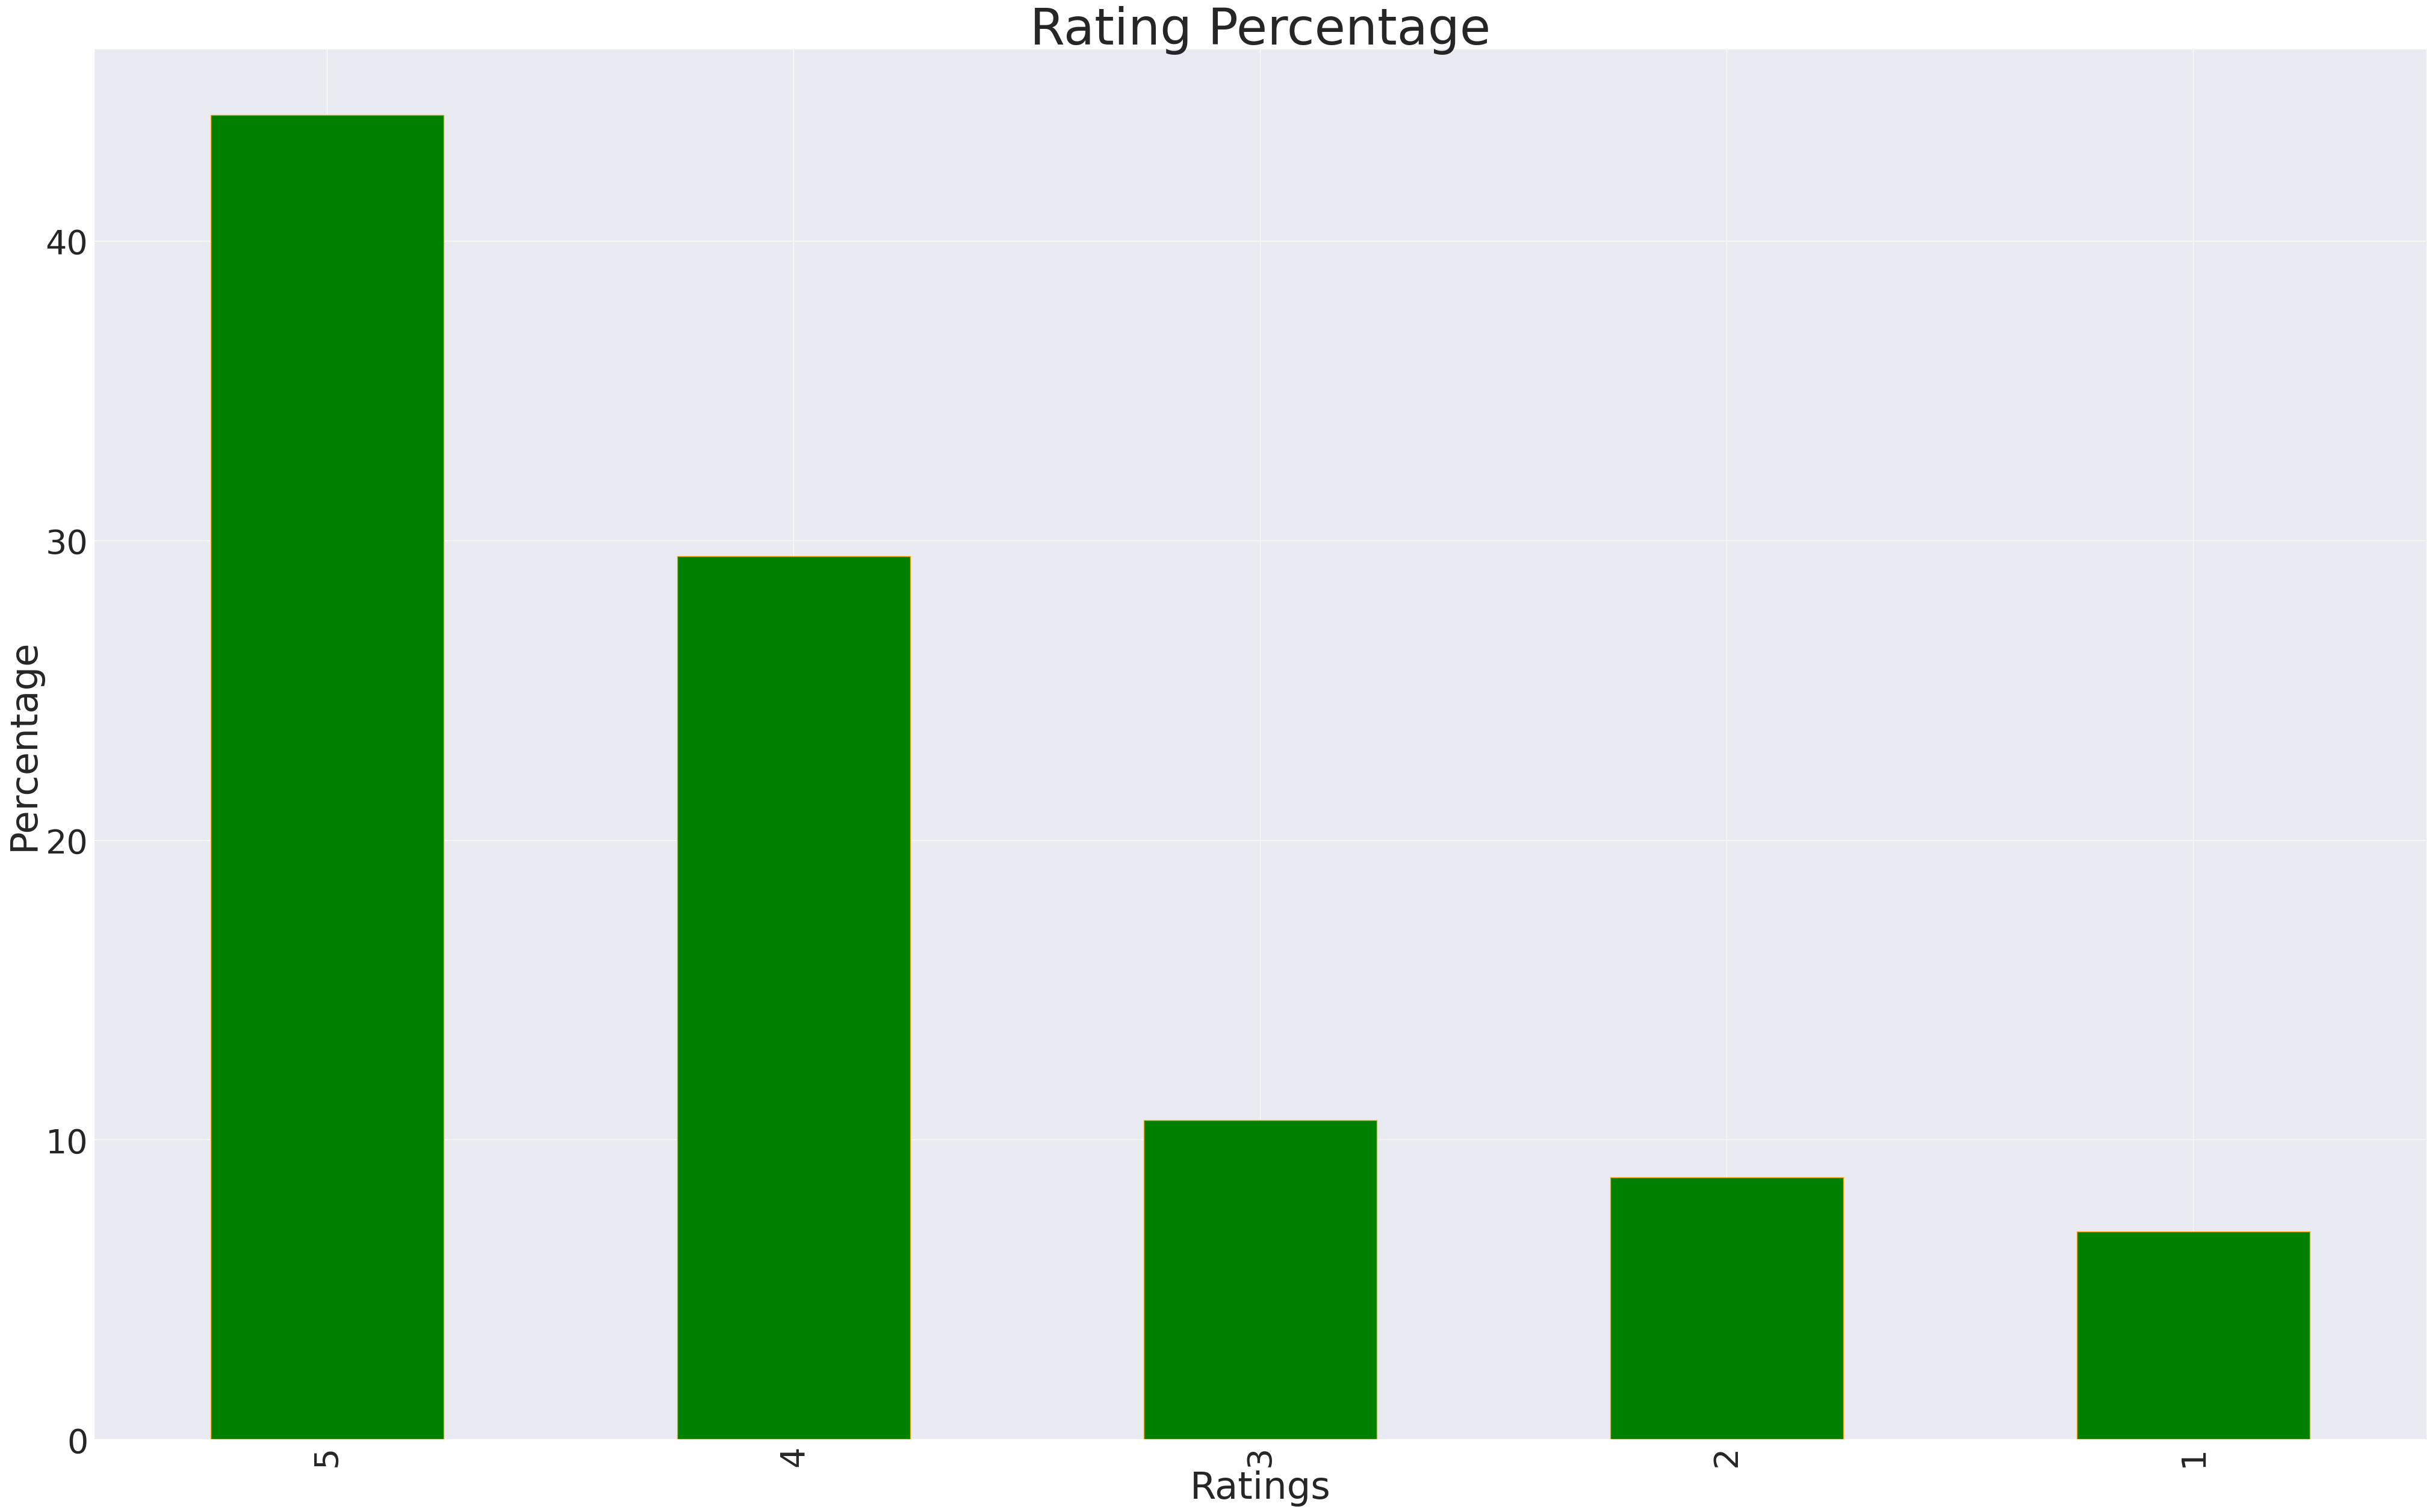

In [ ]:
#Percentage of Rating distribution
print(round(df.Rating.value_counts(normalize=True)*100,2))
round(df.Rating.value_counts(normalize=True)*100,2)
round(df.Rating.value_counts(normalize=True)*100,2).plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel("Ratings",fontsize=45)
plt.ylabel("Percentage",fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Rating Percentage",fontsize=60)
plt.show()

In [ ]:
corpus

<LazyModule 'nltk.corpus'>

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    print(i)
    review = re.sub('[^a-zA-Z ]'," ", x[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
1

#Importing libraries for text preprocessing

In [ ]:
#Importing libraries for text preprocessing

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer=PorterStemmer()
import nltk
nltk.download('wordnet')

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


{'someone', 'these', 'four', 'via', 'nowhere', 'down', 'something', 'anyhow', 'nine', 'was', 'keep', 'empty', 'he', 'at', 'serious', 'latter', 'him', 'least', 'more', 'made', 'further', 'really', 'next', 'throughout', 'any', 'anyway', 'hundred', 'done', 'always', 'but', '’s', 'now', 'just', 'as', '‘ll', 'get', 'their', 'back', 'been', 'already', 'thus', '’ll', "'re", 'its', 'am', 'first', 'seems', 'such', 'thereby', 'unless', 'give', '’m', '’re', 'within', 'also', 'hereupon', 'several', 'part', 'please', 'say', 'it', 'onto', 'per', 'in', 'i', 'towards', 'above', 'nt', 'amongst', 'can', 'still', 'which', 'along', 'various', 'beforehand', 'them', 'beside', 'mine', 'moreover', 'well', 'full', 'top', "'ll", 'us', 'hereafter', 'sometime', 'whoever', 'neither', 'every', 'nor', 'show', 'under', 'call', 'whereas', 'our', 'ever', 'former', 'your', "'ve", 'yet', '‘ve', 'indeed', 'elsewhere', 'bottom', 'below', 'among', 'by', 'a', 'others', 'no', 'using', 'five', 'did', 'twenty', 'me', 'if', 'you

In [ ]:
#Cleaning of texts ie punctuations,special characters,numerical values ,lowering of letters
def text_clean(text):
    text=text.lower()

    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)

    return text


In [ ]:
#Applying function to dataset
cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))




In [ ]:
#Performing lemmatization


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]


corpus=[]



for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])

    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)


corpus[6]

df["Cleaned_Review_Lemmatized"]=corpus


In [ ]:
#Polarity and subjectivity#
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

pos = [5,4,3]
neg = [1]
neu=[2]

def sentiment(rating):
  if rating in pos:
    return "positive"
  elif rating in neg:
    return "negative"
  elif rating in neu:
      return "neutral"

df['Sentiment'] = df['Rating'].apply(sentiment)


In [ ]:
pip install scikit-learn

In [ ]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
ps=PorterStemmer()
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)

def text_clean(text):
    text=text.lower()

    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)

    return text

cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]


corpus=[]


for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])

    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)

corpus[6]

df["Cleaned_Review_Lemmatized"]=corpus



{'someone', 'these', 'four', 'via', 'nowhere', 'down', 'something', 'anyhow', 'nine', 'was', 'keep', 'empty', 'he', 'at', 'serious', 'latter', 'him', 'least', 'more', 'made', 'further', 'really', 'next', 'throughout', 'any', 'anyway', 'hundred', 'done', 'always', 'but', '’s', 'now', 'just', 'as', '‘ll', 'get', 'their', 'back', 'been', 'already', 'thus', '’ll', "'re", 'its', 'am', 'first', 'seems', 'such', 'thereby', 'unless', 'give', '’m', '’re', 'within', 'also', 'hereupon', 'several', 'part', 'please', 'say', 'it', 'onto', 'per', 'in', 'i', 'towards', 'above', 'nt', 'amongst', 'can', 'still', 'which', 'along', 'various', 'beforehand', 'them', 'beside', 'mine', 'moreover', 'well', 'full', 'top', "'ll", 'us', 'hereafter', 'sometime', 'whoever', 'neither', 'every', 'nor', 'show', 'under', 'call', 'whereas', 'our', 'ever', 'former', 'your', "'ve", 'yet', '‘ve', 'indeed', 'elsewhere', 'bottom', 'below', 'among', 'by', 'a', 'others', 'no', 'using', 'five', 'did', 'twenty', 'me', 'if', 'you

In [ ]:
#Creating positive wordcloud
from wordcloud import WordCloud

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)


{'someone', 'these', 'four', 'via', 'nowhere', 'down', 'something', 'anyhow', 'nine', 'was', 'keep', 'empty', 'he', 'at', 'serious', 'latter', 'him', 'least', 'more', 'made', 'further', 'really', 'next', 'throughout', 'any', 'anyway', 'hundred', 'done', 'always', 'but', '’s', 'now', 'just', 'as', '‘ll', 'get', 'their', 'back', 'been', 'already', 'thus', '’ll', "'re", 'its', 'am', 'first', 'seems', 'such', 'thereby', 'unless', 'give', '’m', '’re', 'within', 'also', 'hereupon', 'several', 'part', 'please', 'say', 'it', 'onto', 'per', 'in', 'i', 'towards', 'above', 'nt', 'amongst', 'can', 'still', 'which', 'along', 'various', 'beforehand', 'them', 'beside', 'mine', 'moreover', 'well', 'full', 'top', "'ll", 'us', 'hereafter', 'sometime', 'whoever', 'neither', 'every', 'nor', 'show', 'under', 'call', 'whereas', 'our', 'ever', 'former', 'your', "'ve", 'yet', '‘ve', 'indeed', 'elsewhere', 'bottom', 'below', 'among', 'by', 'a', 'others', 'no', 'using', 'five', 'did', 'twenty', 'me', 'if', 'you

In [ ]:
#Polarity and subjectivity#
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.subjectivity)


In [ ]:
#Printing 5 reviews with highest polarity
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['Polarity'].sort_values(ascending=False)[:5].index]['Cleaned_Reviews']):
    print('Review {}:\n'.format(index+1),review)


5 Random Reviews with Highest Polarity:
Review 1:
 absolutely wonderful wonderful serene oasis city millions steps away times square entering hotel peacefulness eveloping lounge wonderful treat morning afternoon wonderful treated meet travellers business people share experiencesloved  
Review 2:
 best went boxing day  weeks best time food pool staff beach room    kids age   didnt want come homei againloved xx  
Review 3:
 excellent excellent excellent stayed nights start november excellent location excellent staff excellent price  
Review 4:
 number hotel number ranking perfect way best breakfast world  
Review 5:
 did not disappoint superb hotel needs lifts elevators prefer smiles staff hong kong inspired pastry chefs poached hyatt make heavenly  


In [ ]:
#Printing 5 reviews with negative polarity
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['Polarity'].sort_values(ascending=True)[:5].index]['Cleaned_Reviews']):
  print('Review {}:\n'.format(index+1),review)


5 Random Reviews with Lowest Polarity:
Review 1:
 worst location does say place eat sub place make order bullet proof glass  
Review 2:
 not stay stayed group people  person ceiling bathroom fell rooms dirty musty overpriced pina colada no rum  service terrible check charged maid gratuity bell man gratuity absolutely terrible place  
Review 3:
 frontdesk extremely bad service checkin onebedroom sept stay  months people desk horrible not answer calls guest room request items received requested bowl  days reminding morning evening bowl turn upthe desk said conclusion dont trust  
Review 4:
 worst worst hotel experiences life moment wife walked knew trouble carpet filthy odor lobby switched room odor room got gum stains carpet not mention stains bed spreadsimply horrible  
Review 5:
 greta london base stayed london bridge march impresses hotel point view location staff accomodationi recommend highyl anybody going london weekend  


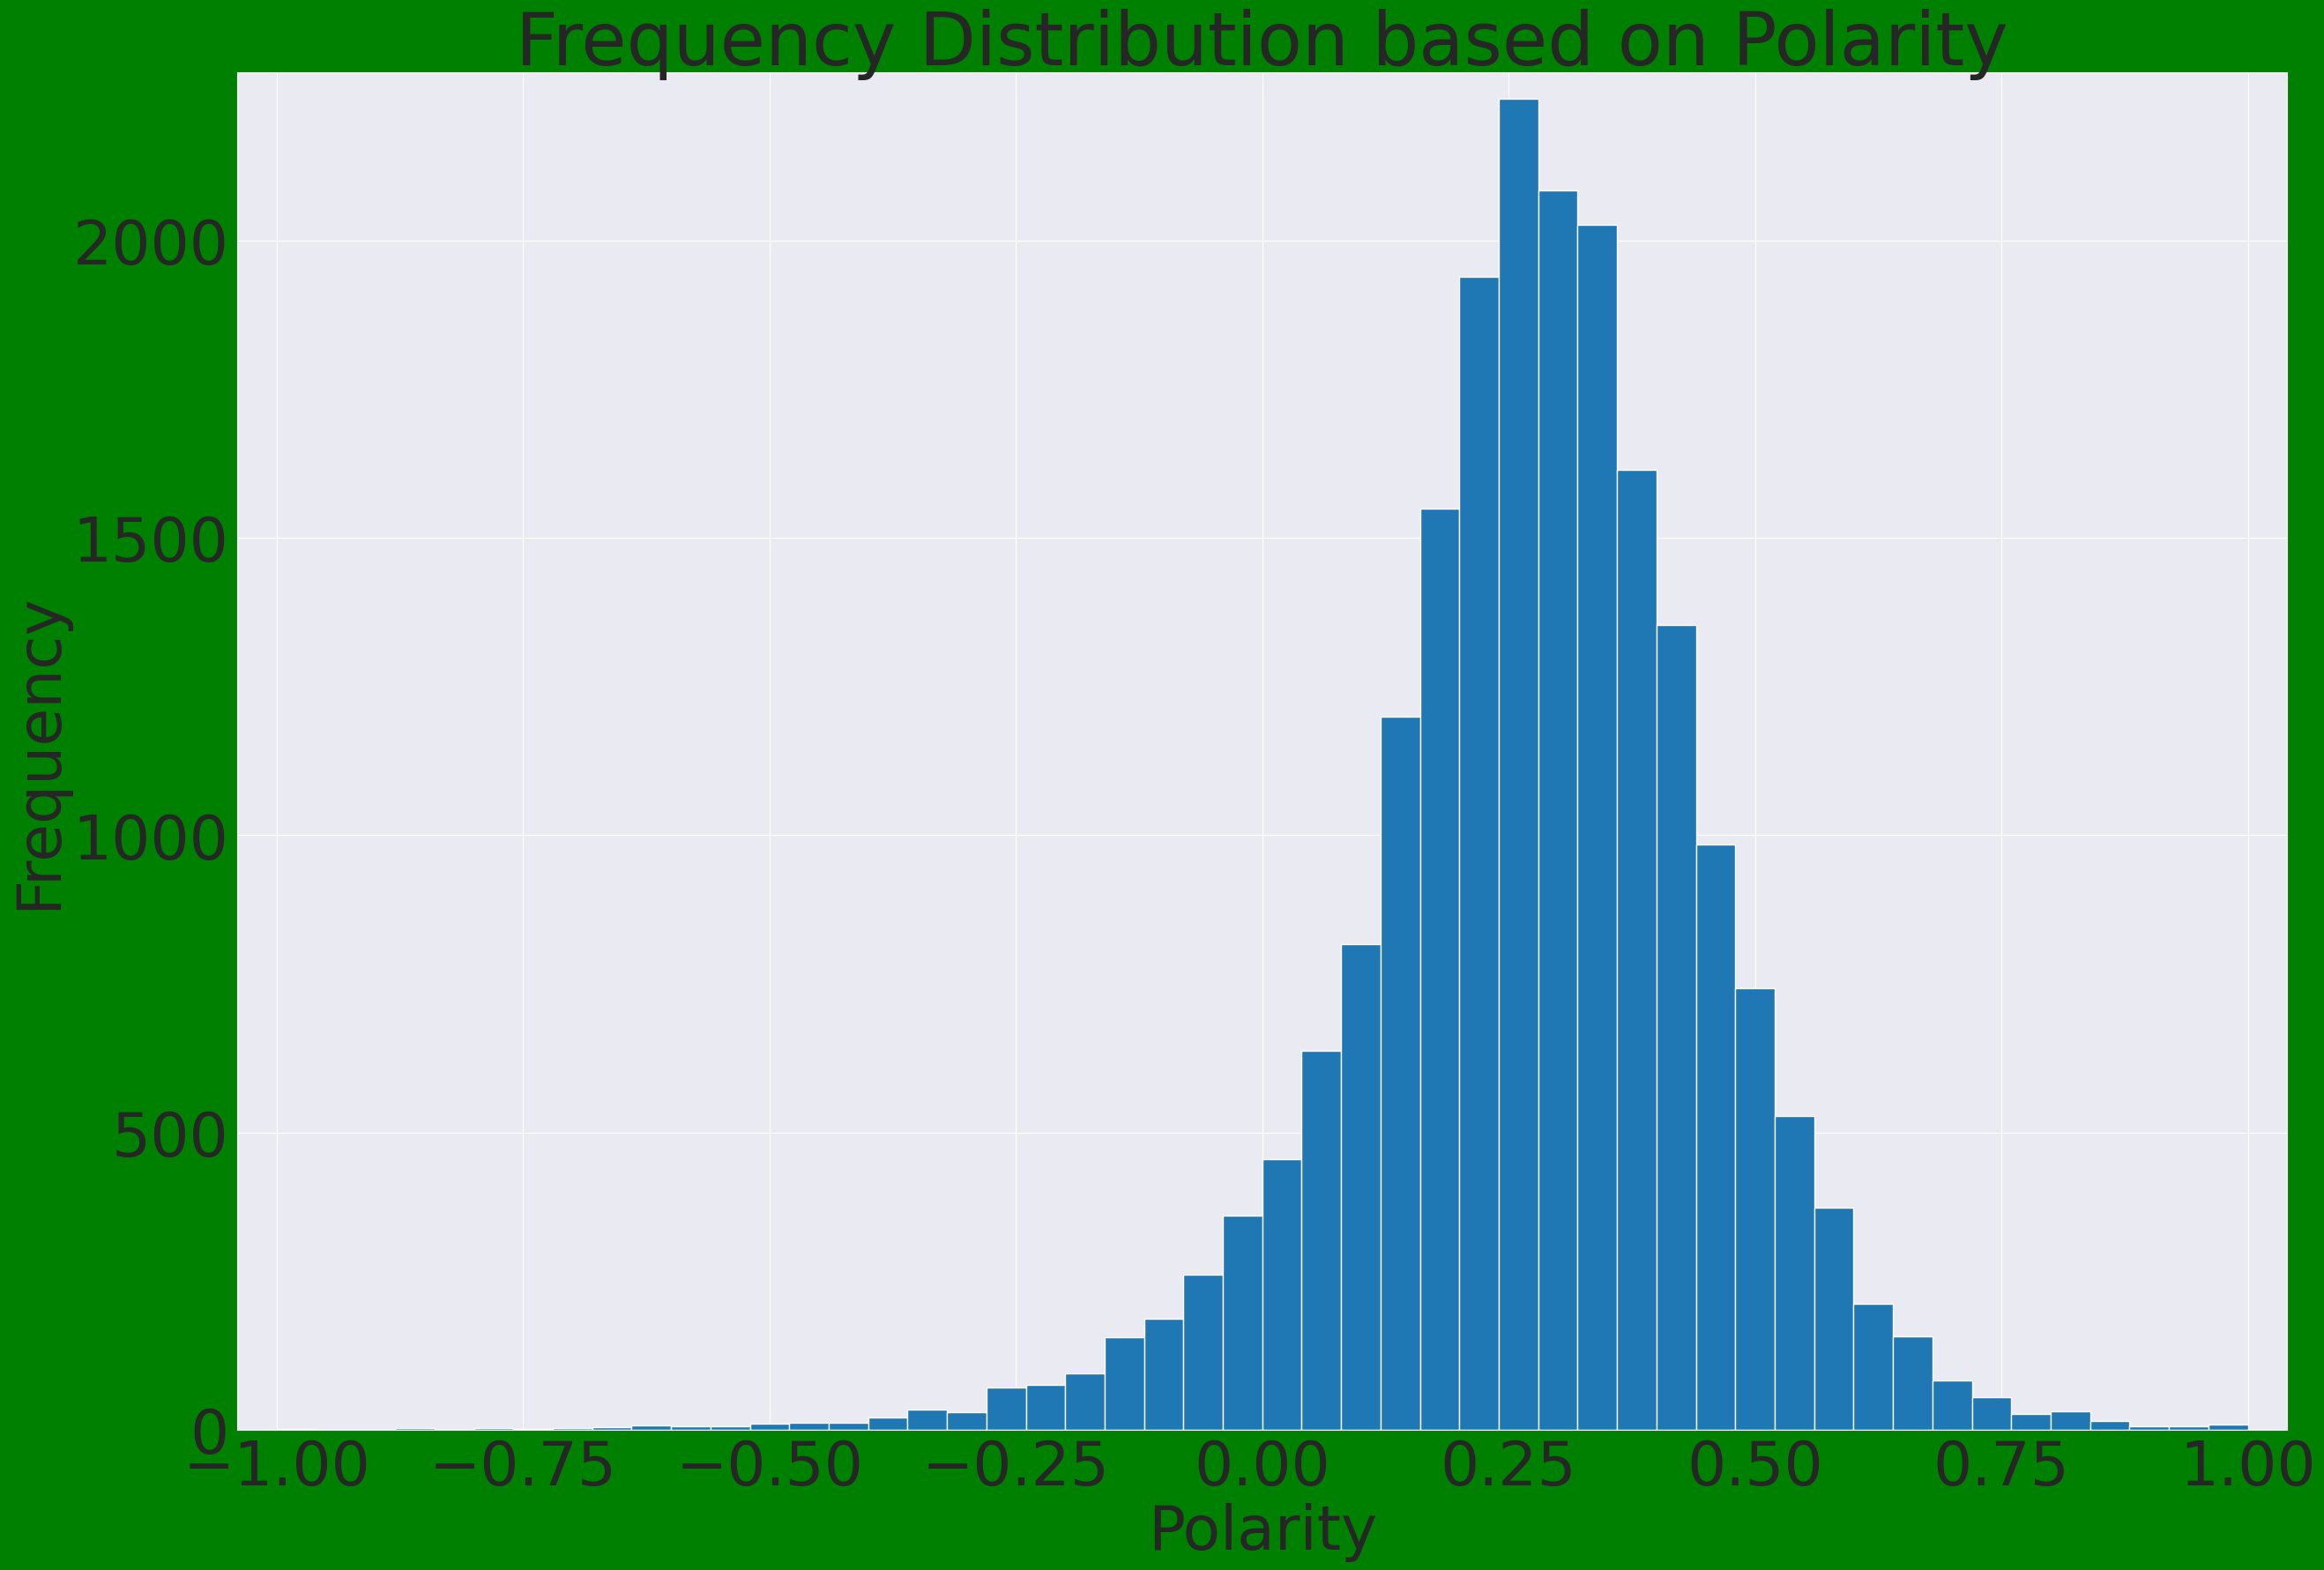

In [ ]:
 #Frequency Distribution based on Polarity
plt.figure(figsize=(30,20),facecolor="green",edgecolor="orange")
plt.margins(0.02)
plt.xlabel("Polarity",fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel("Frequency",fontsize=50)
plt.yticks(fontsize=50)
plt.hist(df["Polarity"],bins=50)
plt.title("Frequency Distribution based on Polarity",fontsize=60)
plt.show()


<Axes: title={'center': 'Percentage of Ratings'}, ylabel='Rating'>

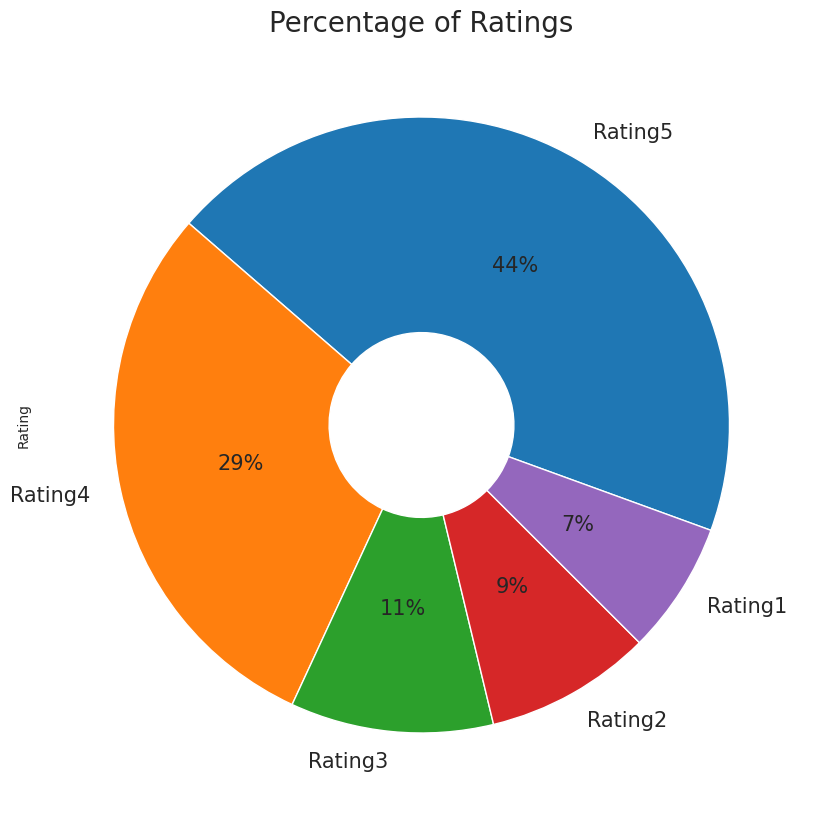

In [ ]:
#Pie plot of percentage of ratings
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,
                              textprops={'fontsize': 15})


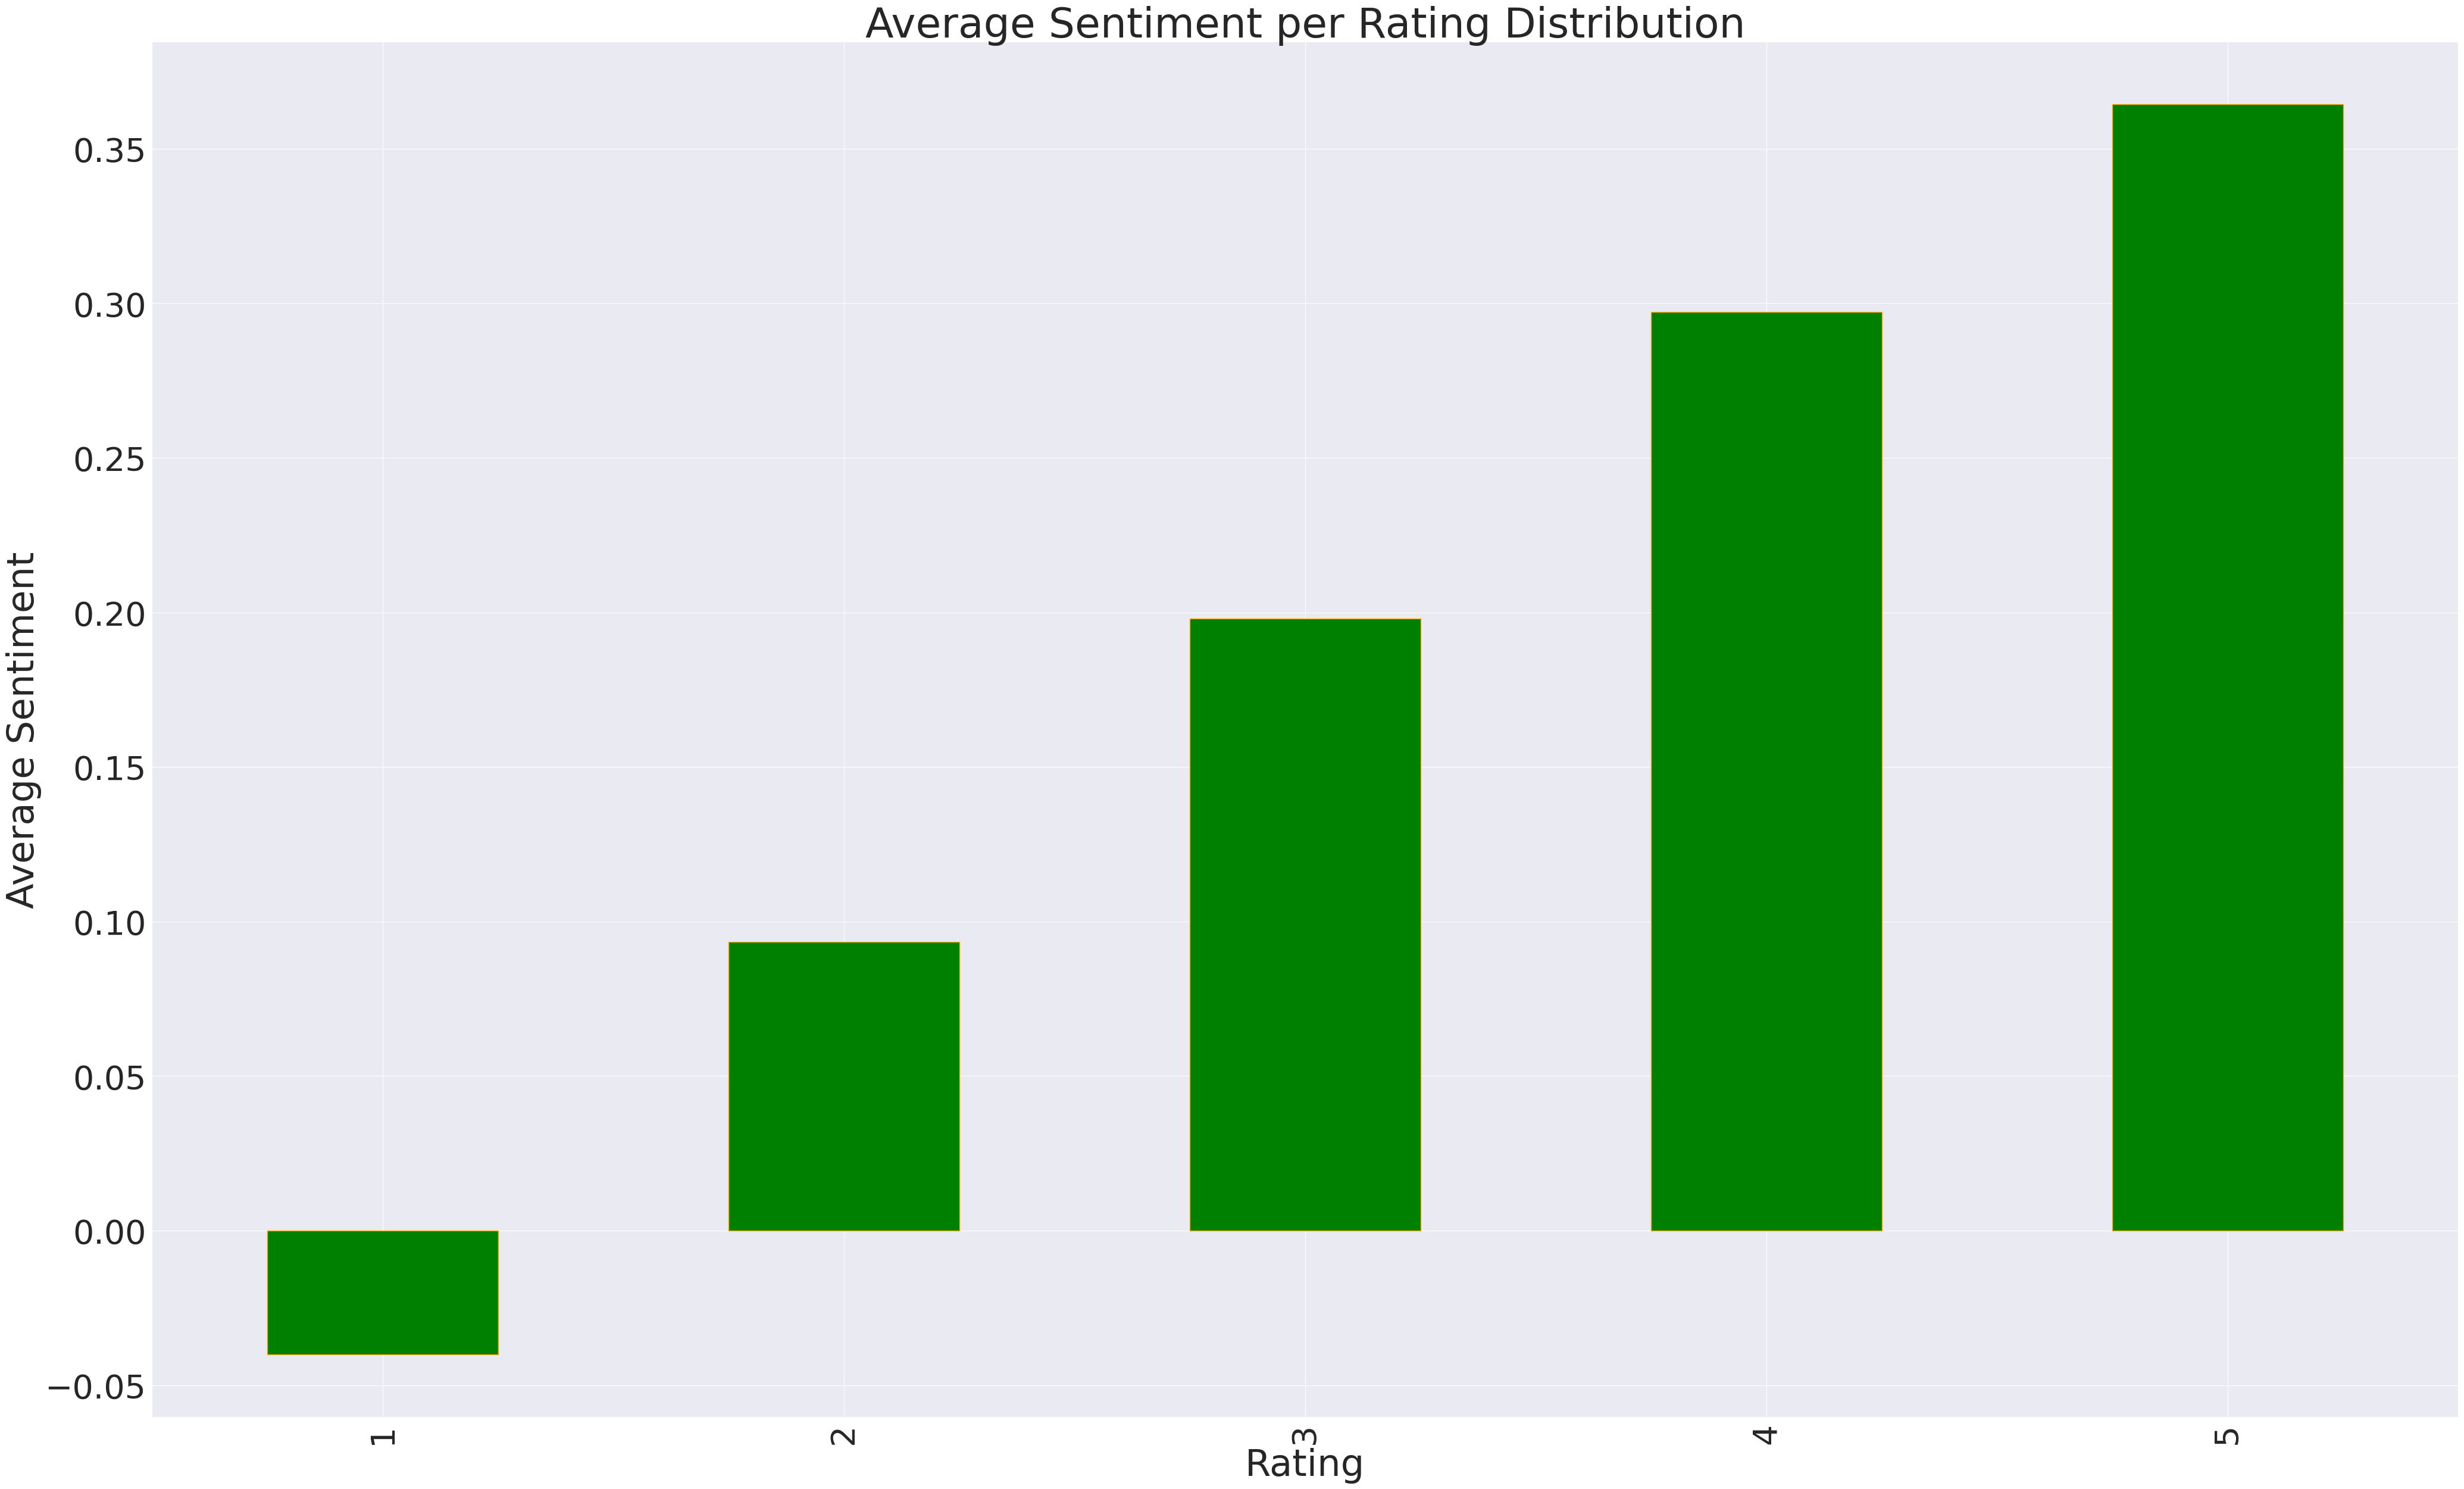

In [ ]:
#Sentiment distribution based on ratings
polarity_avg = df.groupby('Rating')['Polarity'].mean().plot(kind='bar', figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()


In [ ]:
#Counting no of words in each review
df["Word Count"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:len(str(x).split()))


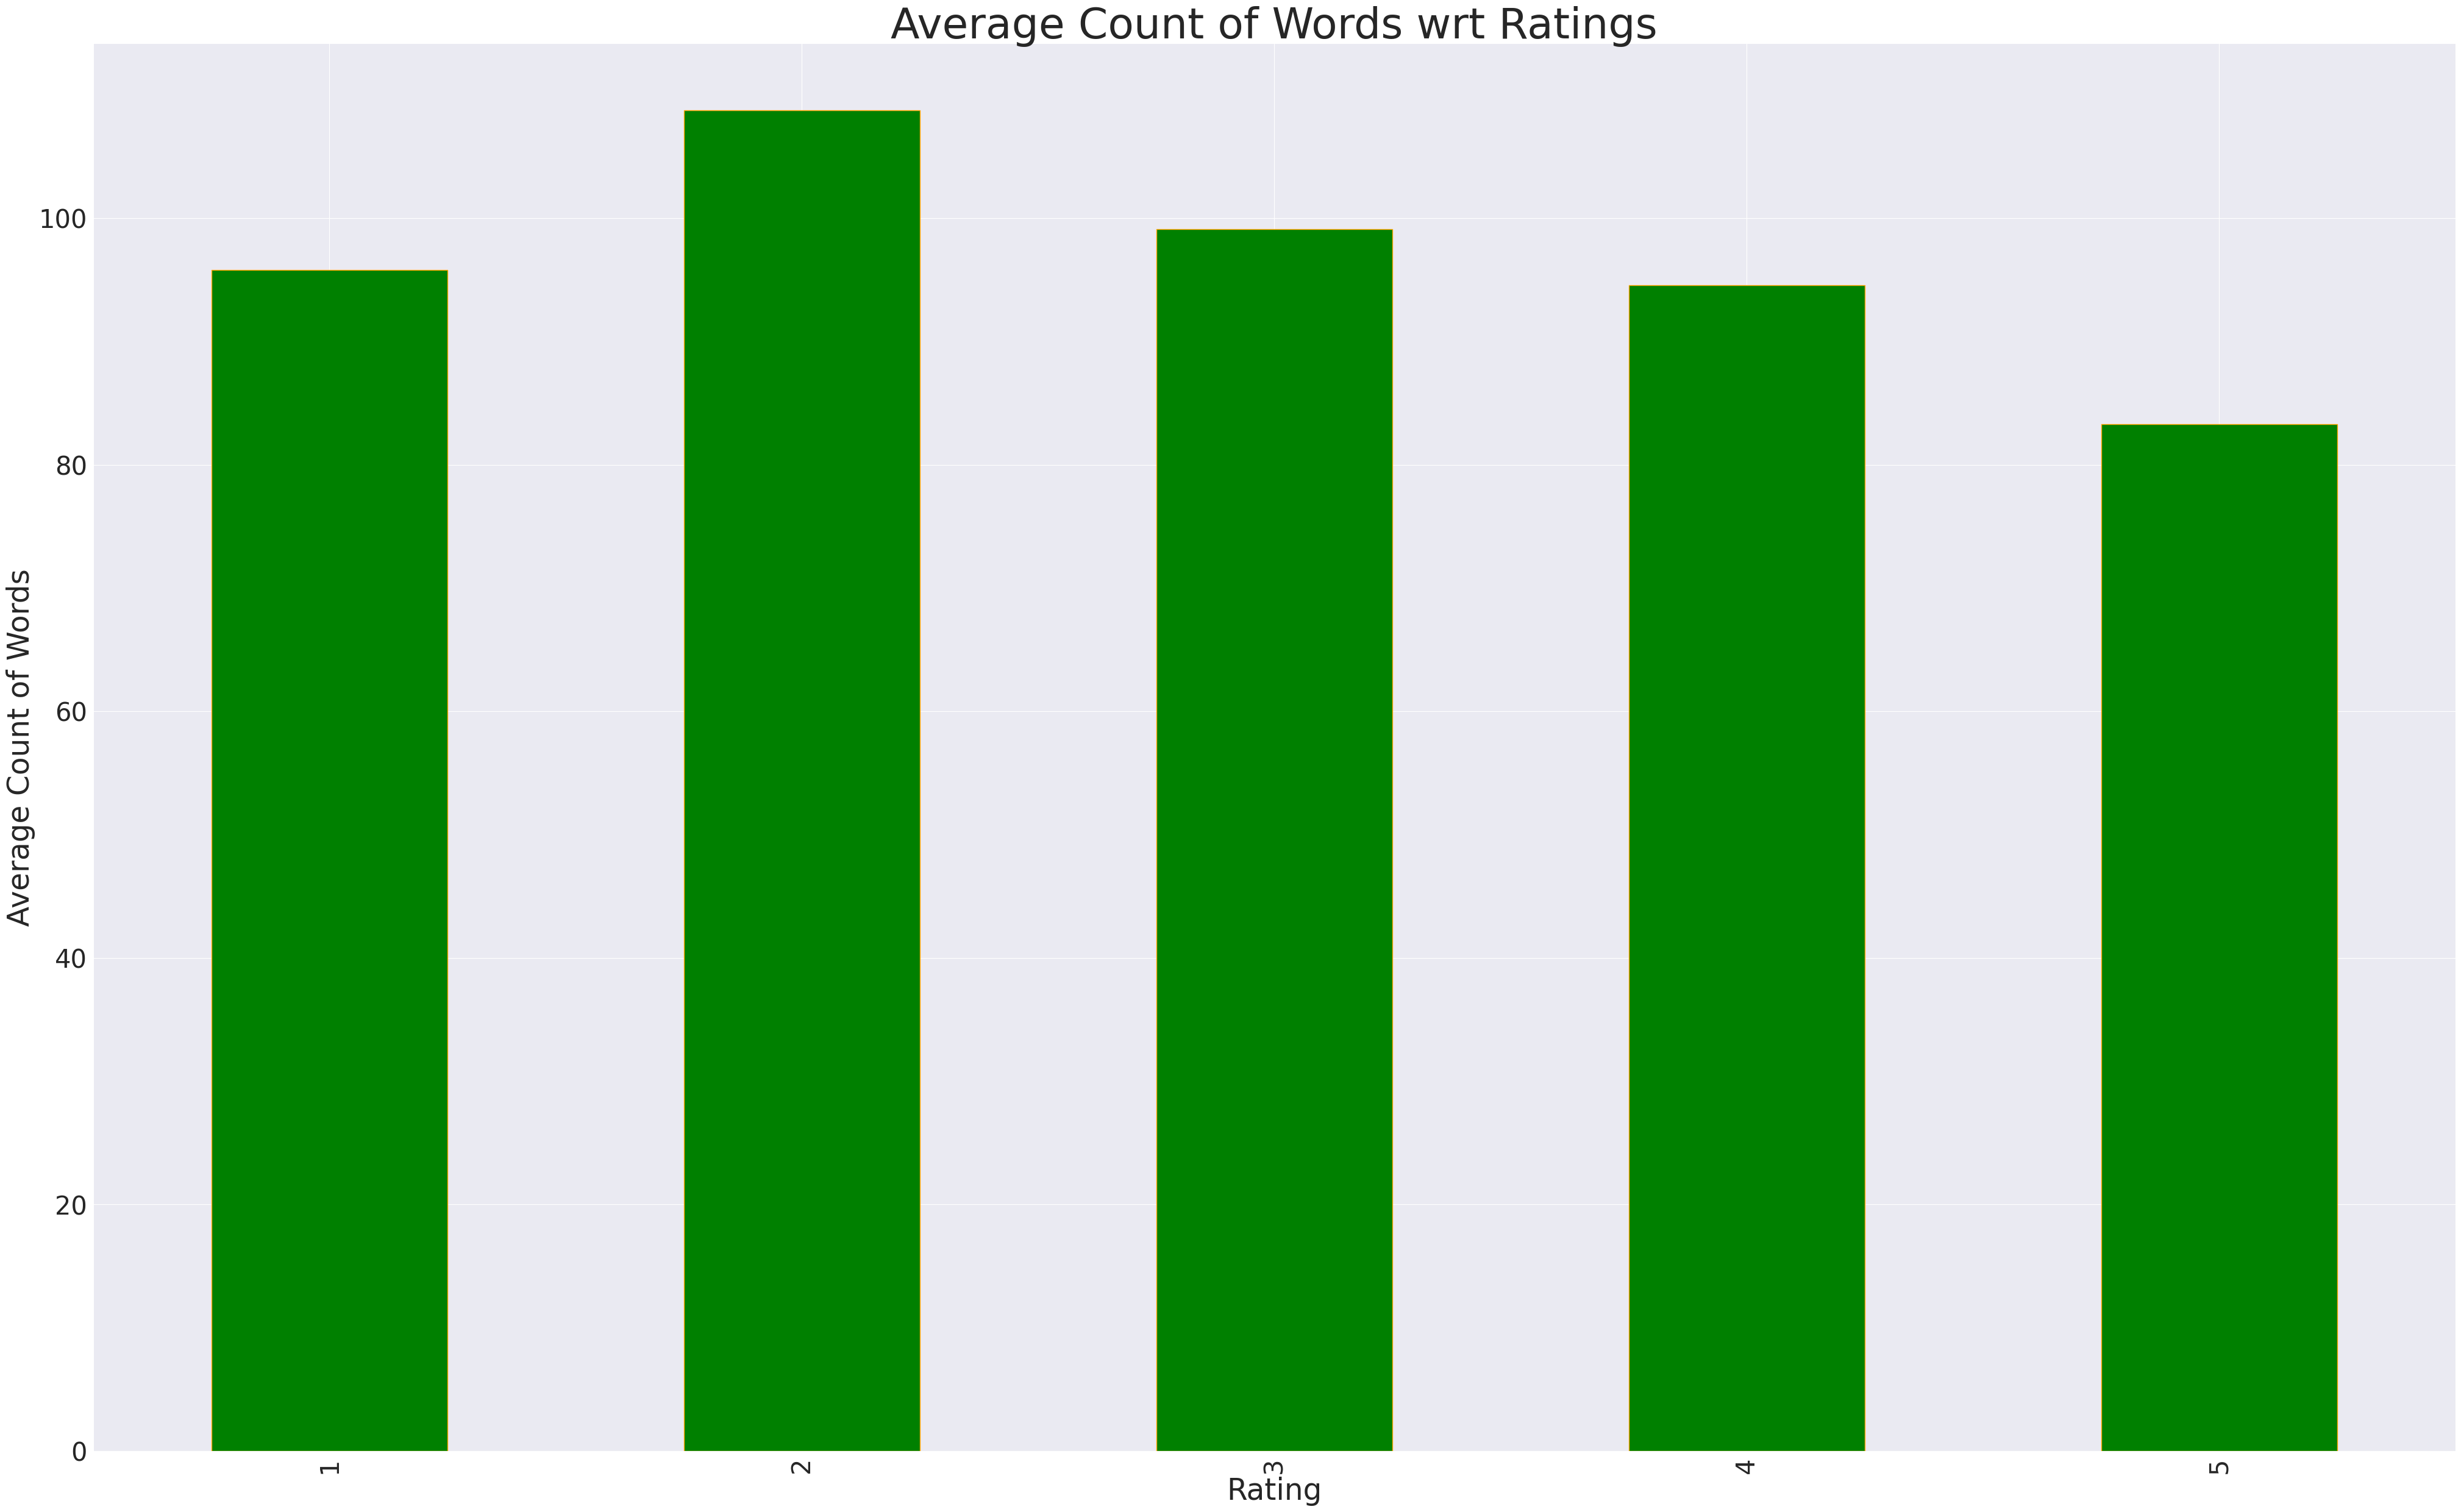

In [ ]:
#Average no of words wrt ratings
word_avg=df.groupby("Rating")["Word Count"].mean().plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating',fontsize=35)
plt.ylabel("Average Count of Words",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Average Count of Words wrt Ratings",fontsize=50)
plt.show()


In [ ]:
#Counting no of letters in each review
df['review_len'] = df['Cleaned_Review_Lemmatized'].astype(str).apply(len)


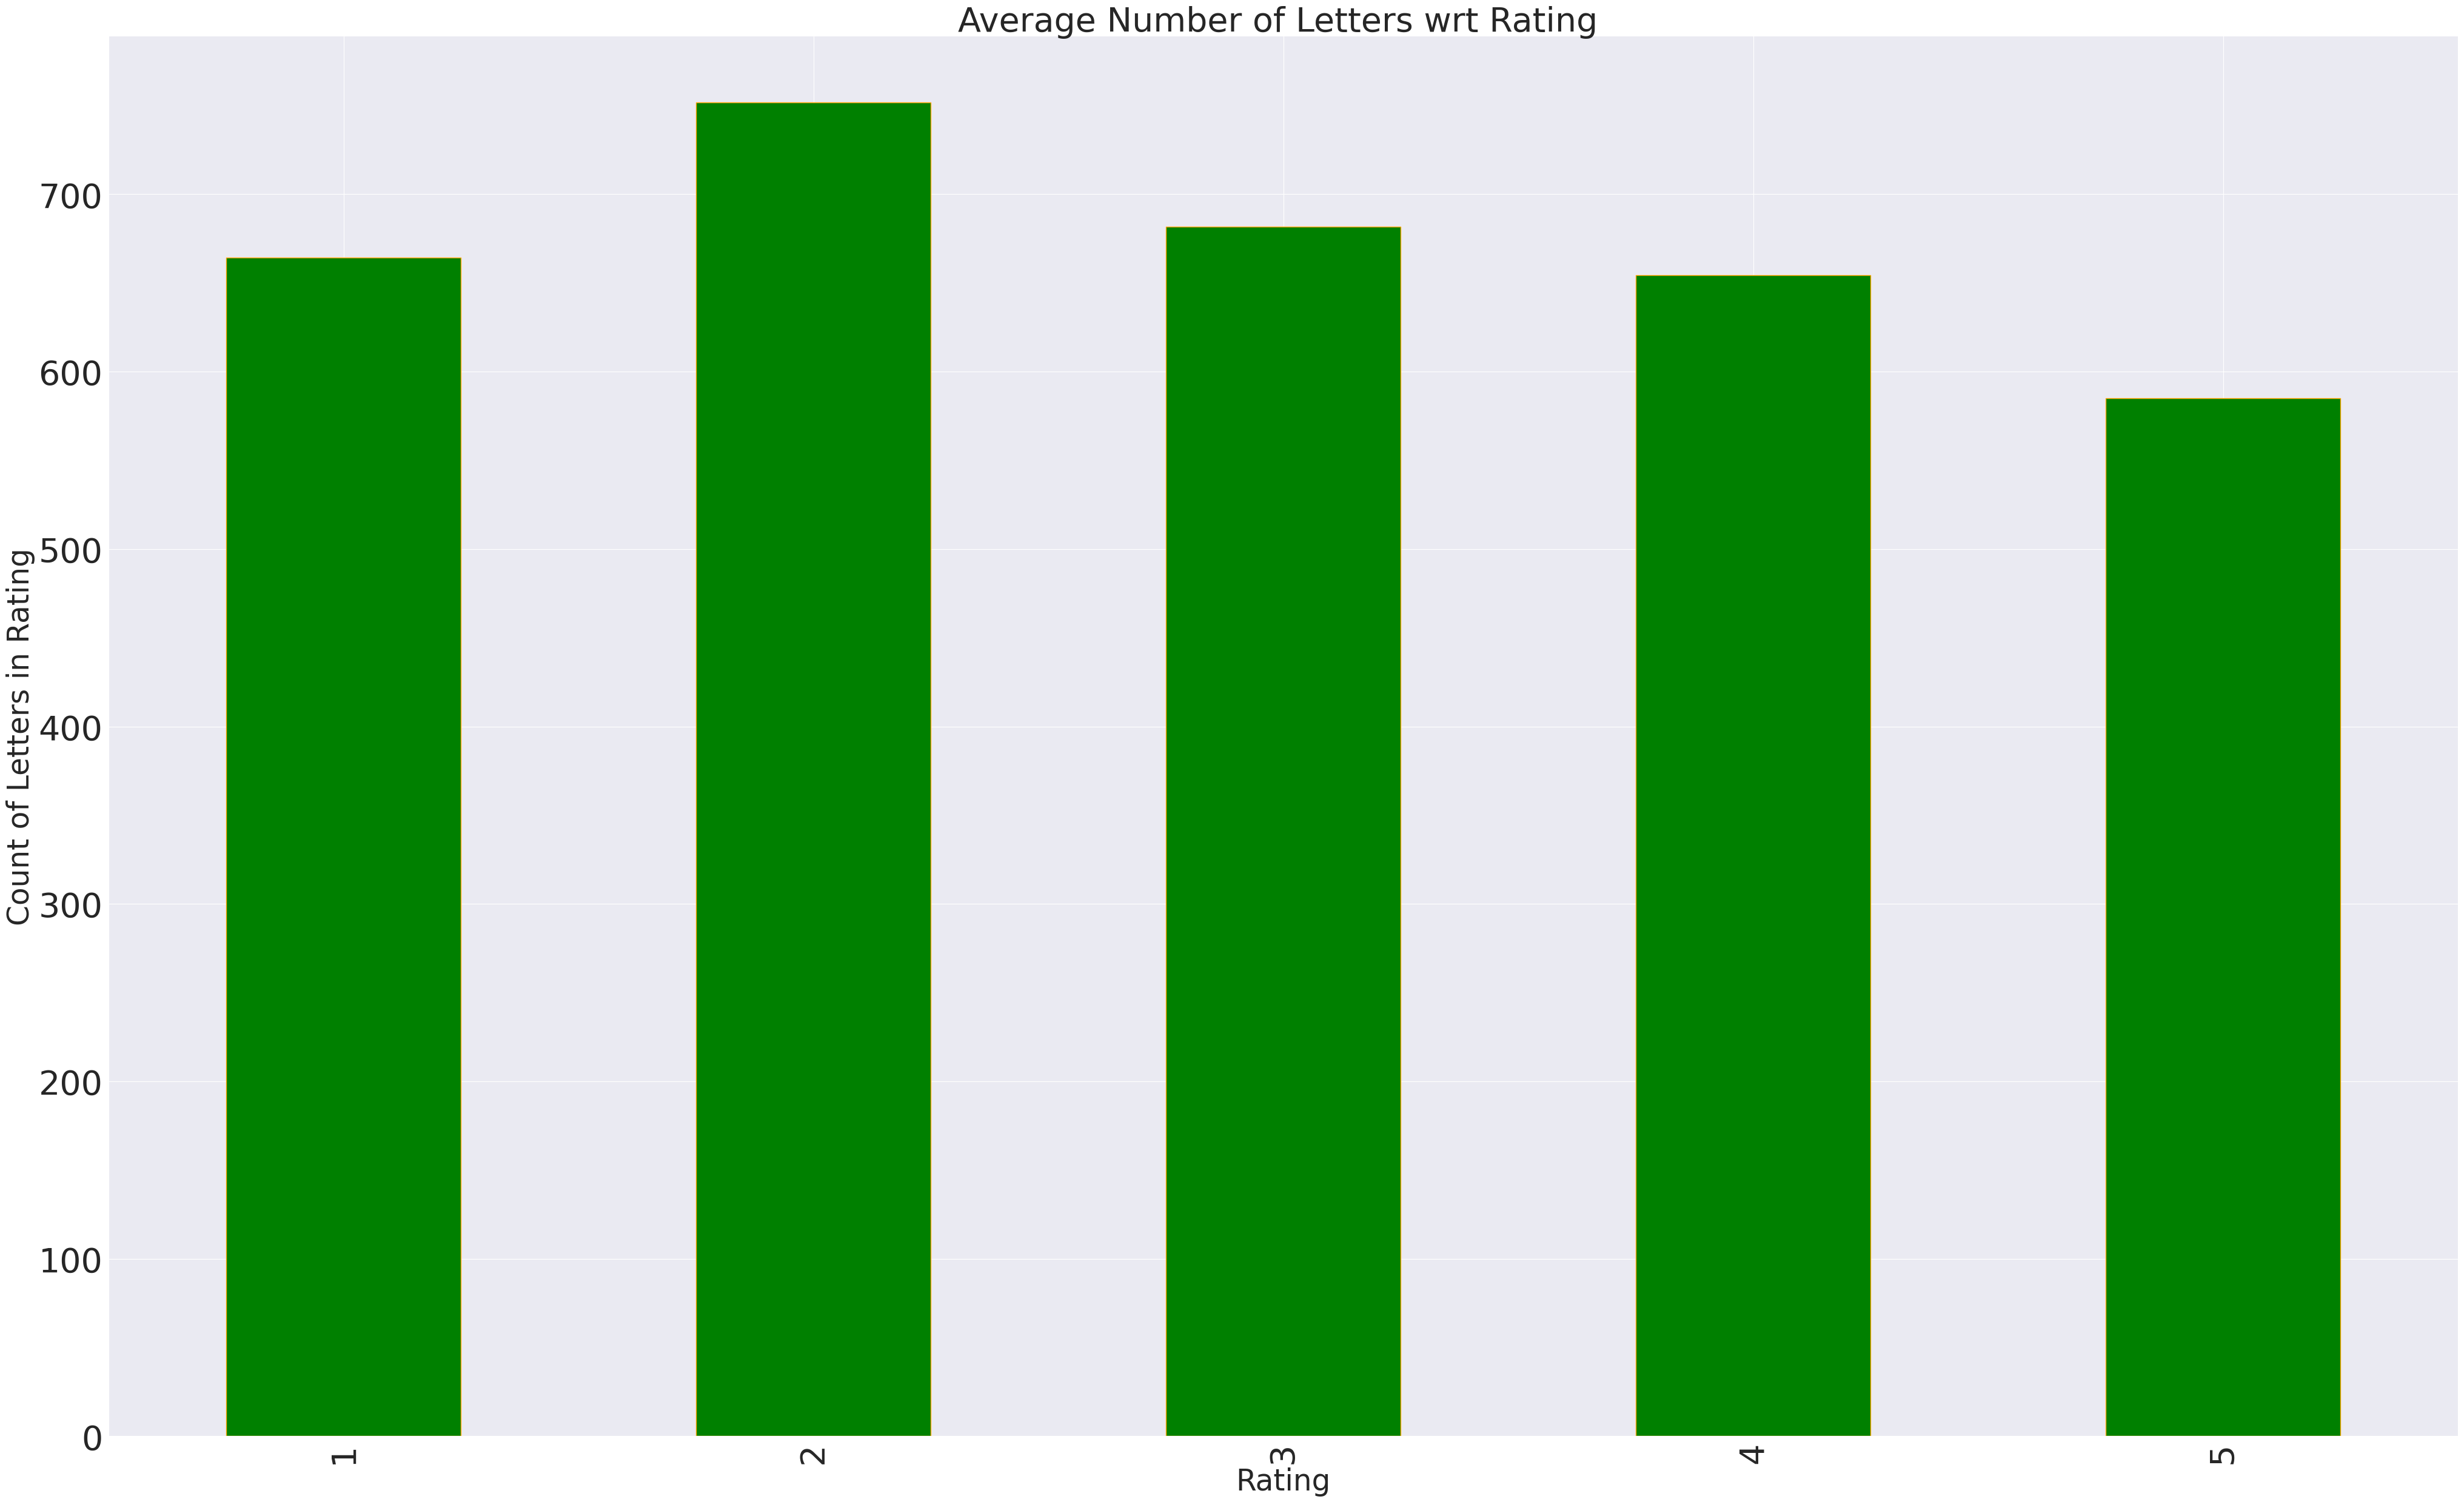

In [ ]:
#Average no of letters wrt ratings
letter_avg = df.groupby('Rating')['review_len'].mean().plot(kind='bar', figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters wrt Rating ', fontsize=40)
plt.show()


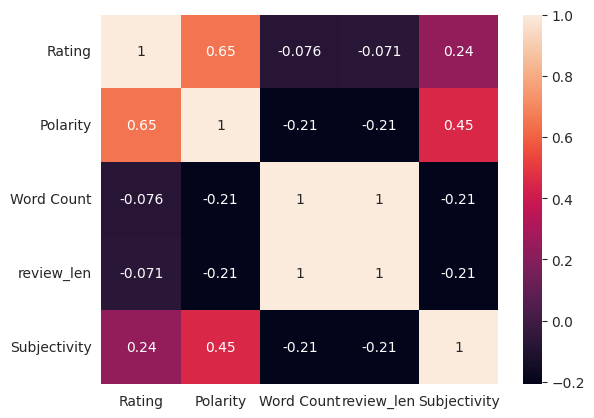

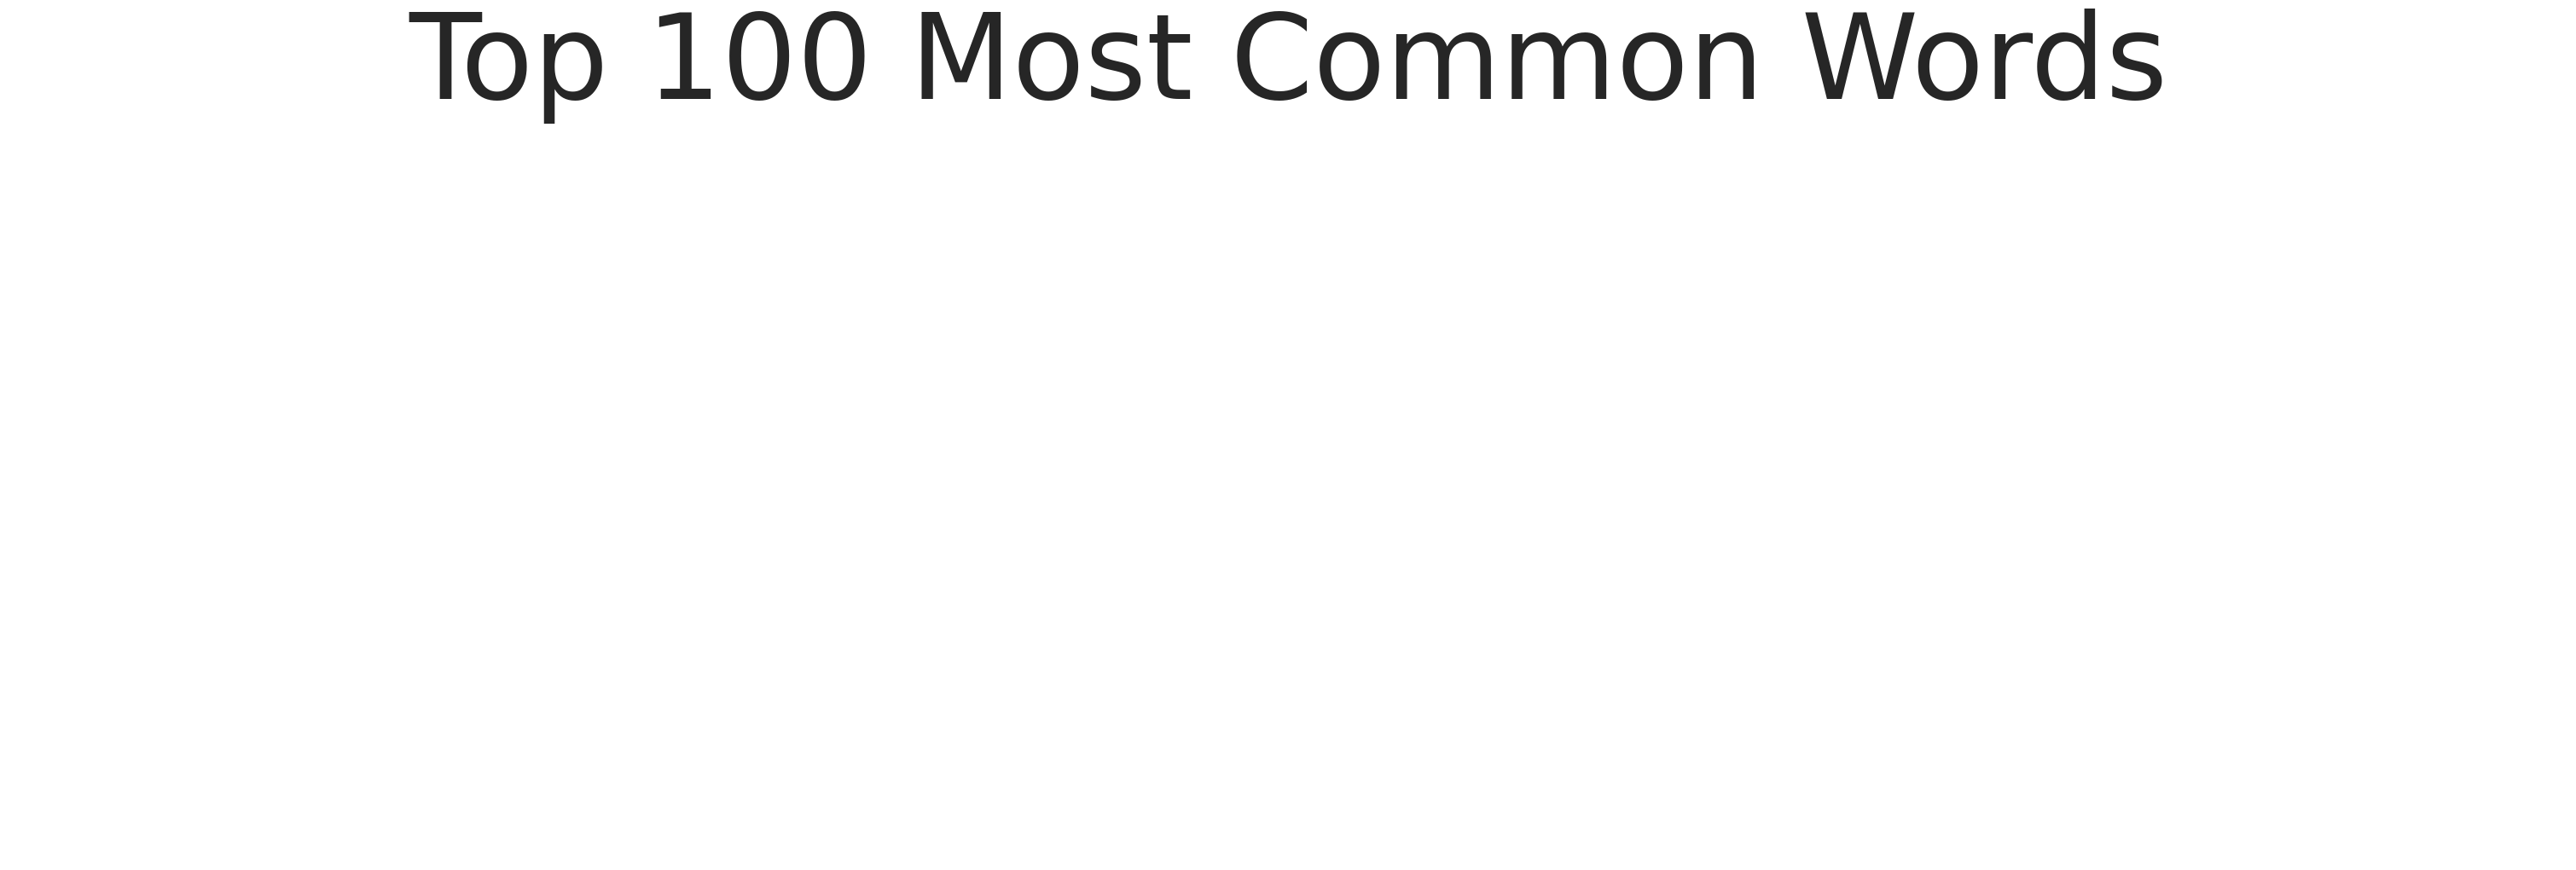

In [ ]:
#Corelation of features
corelation=df[["Rating","Polarity","Word Count","review_len","Subjectivity"]].corr()

sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)


#Counting 100 most common words in our data
from nltk.probability import FreqDist
mostcommon = FreqDist(df["Cleaned_Review_Lemmatized"]).most_common(100)

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()





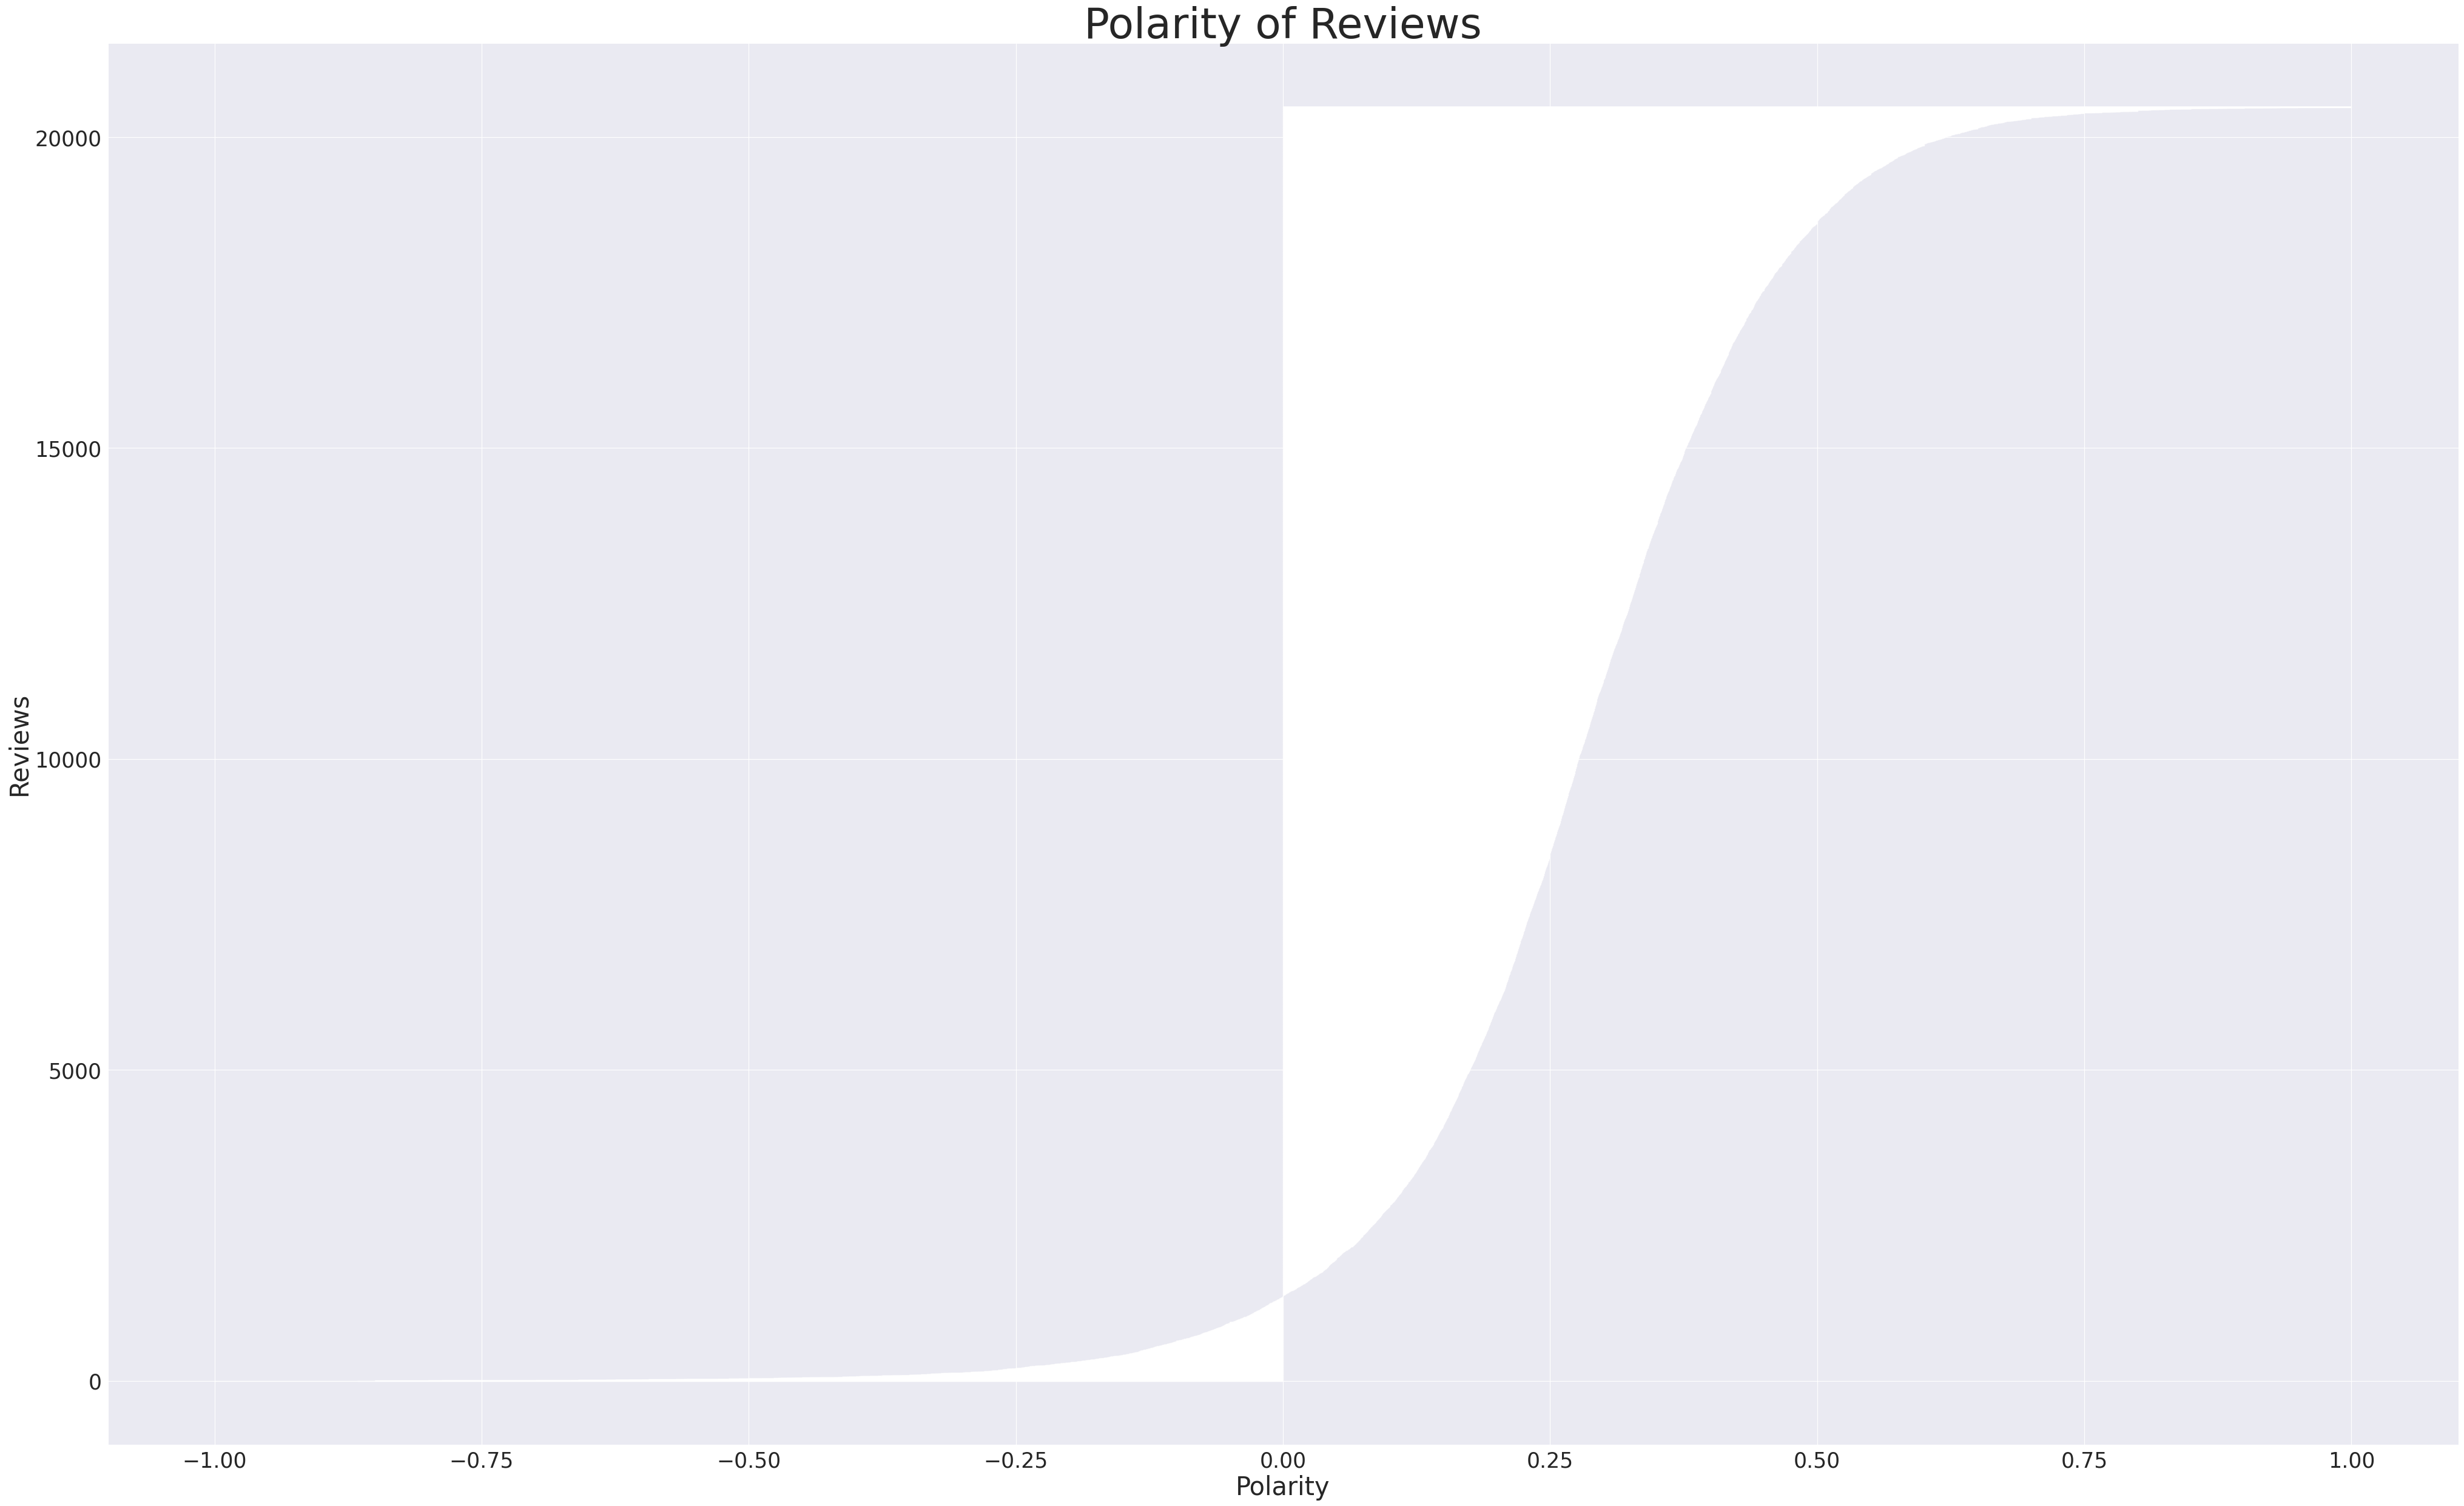

In [ ]:
polarity_positive_data=pd.DataFrame(df.groupby("Cleaned_Reviews")["Polarity"].mean().sort_values(ascending=True))

plt.figure(figsize=(50,30))
plt.xlabel('Polarity',fontsize=30)
plt.ylabel('Reviews',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Polarity of Reviews',fontsize=50)
polarity_graph=plt.barh(np.arange(len(polarity_positive_data.index)),polarity_positive_data['Polarity'],color='purple',)



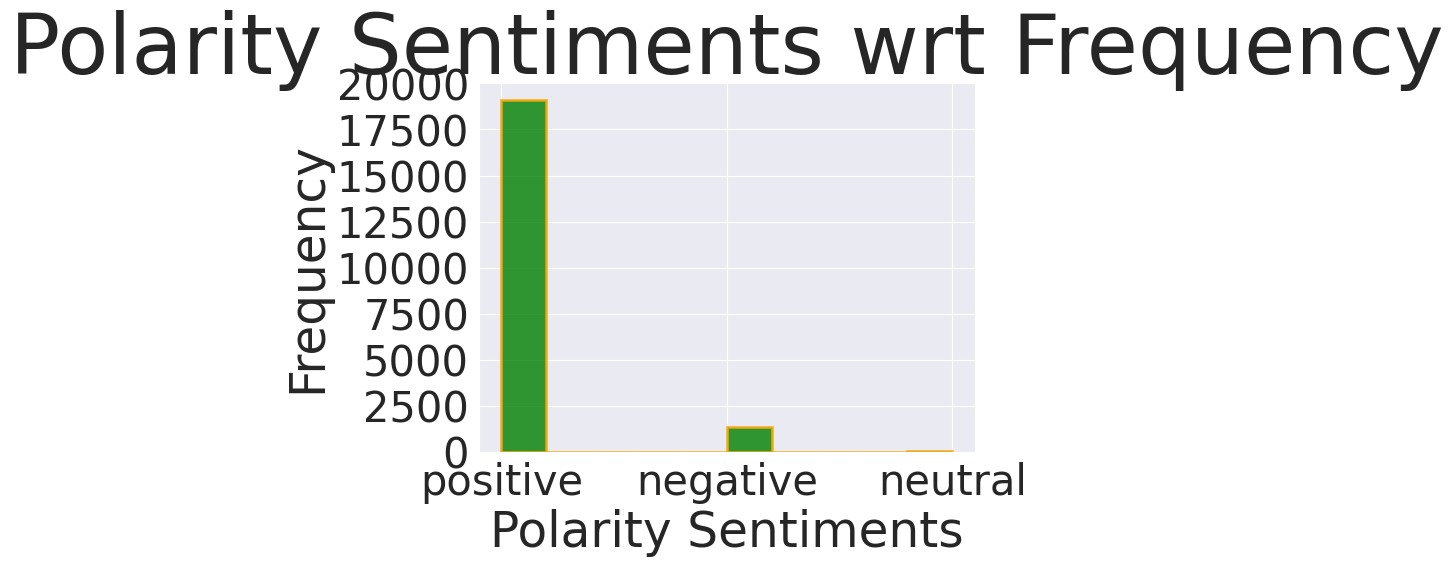

In [ ]:
#categorizing reviews in positive,negative and neutral#
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

plt.hist(df["polarity_score"],bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)
plt.xlabel("Polarity Sentiments",fontsize=35)
plt.ylabel("Frequency",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Polarity Sentiments wrt Frequency",fontsize=60)
plt.show()


In [ ]:
from collections import Counter

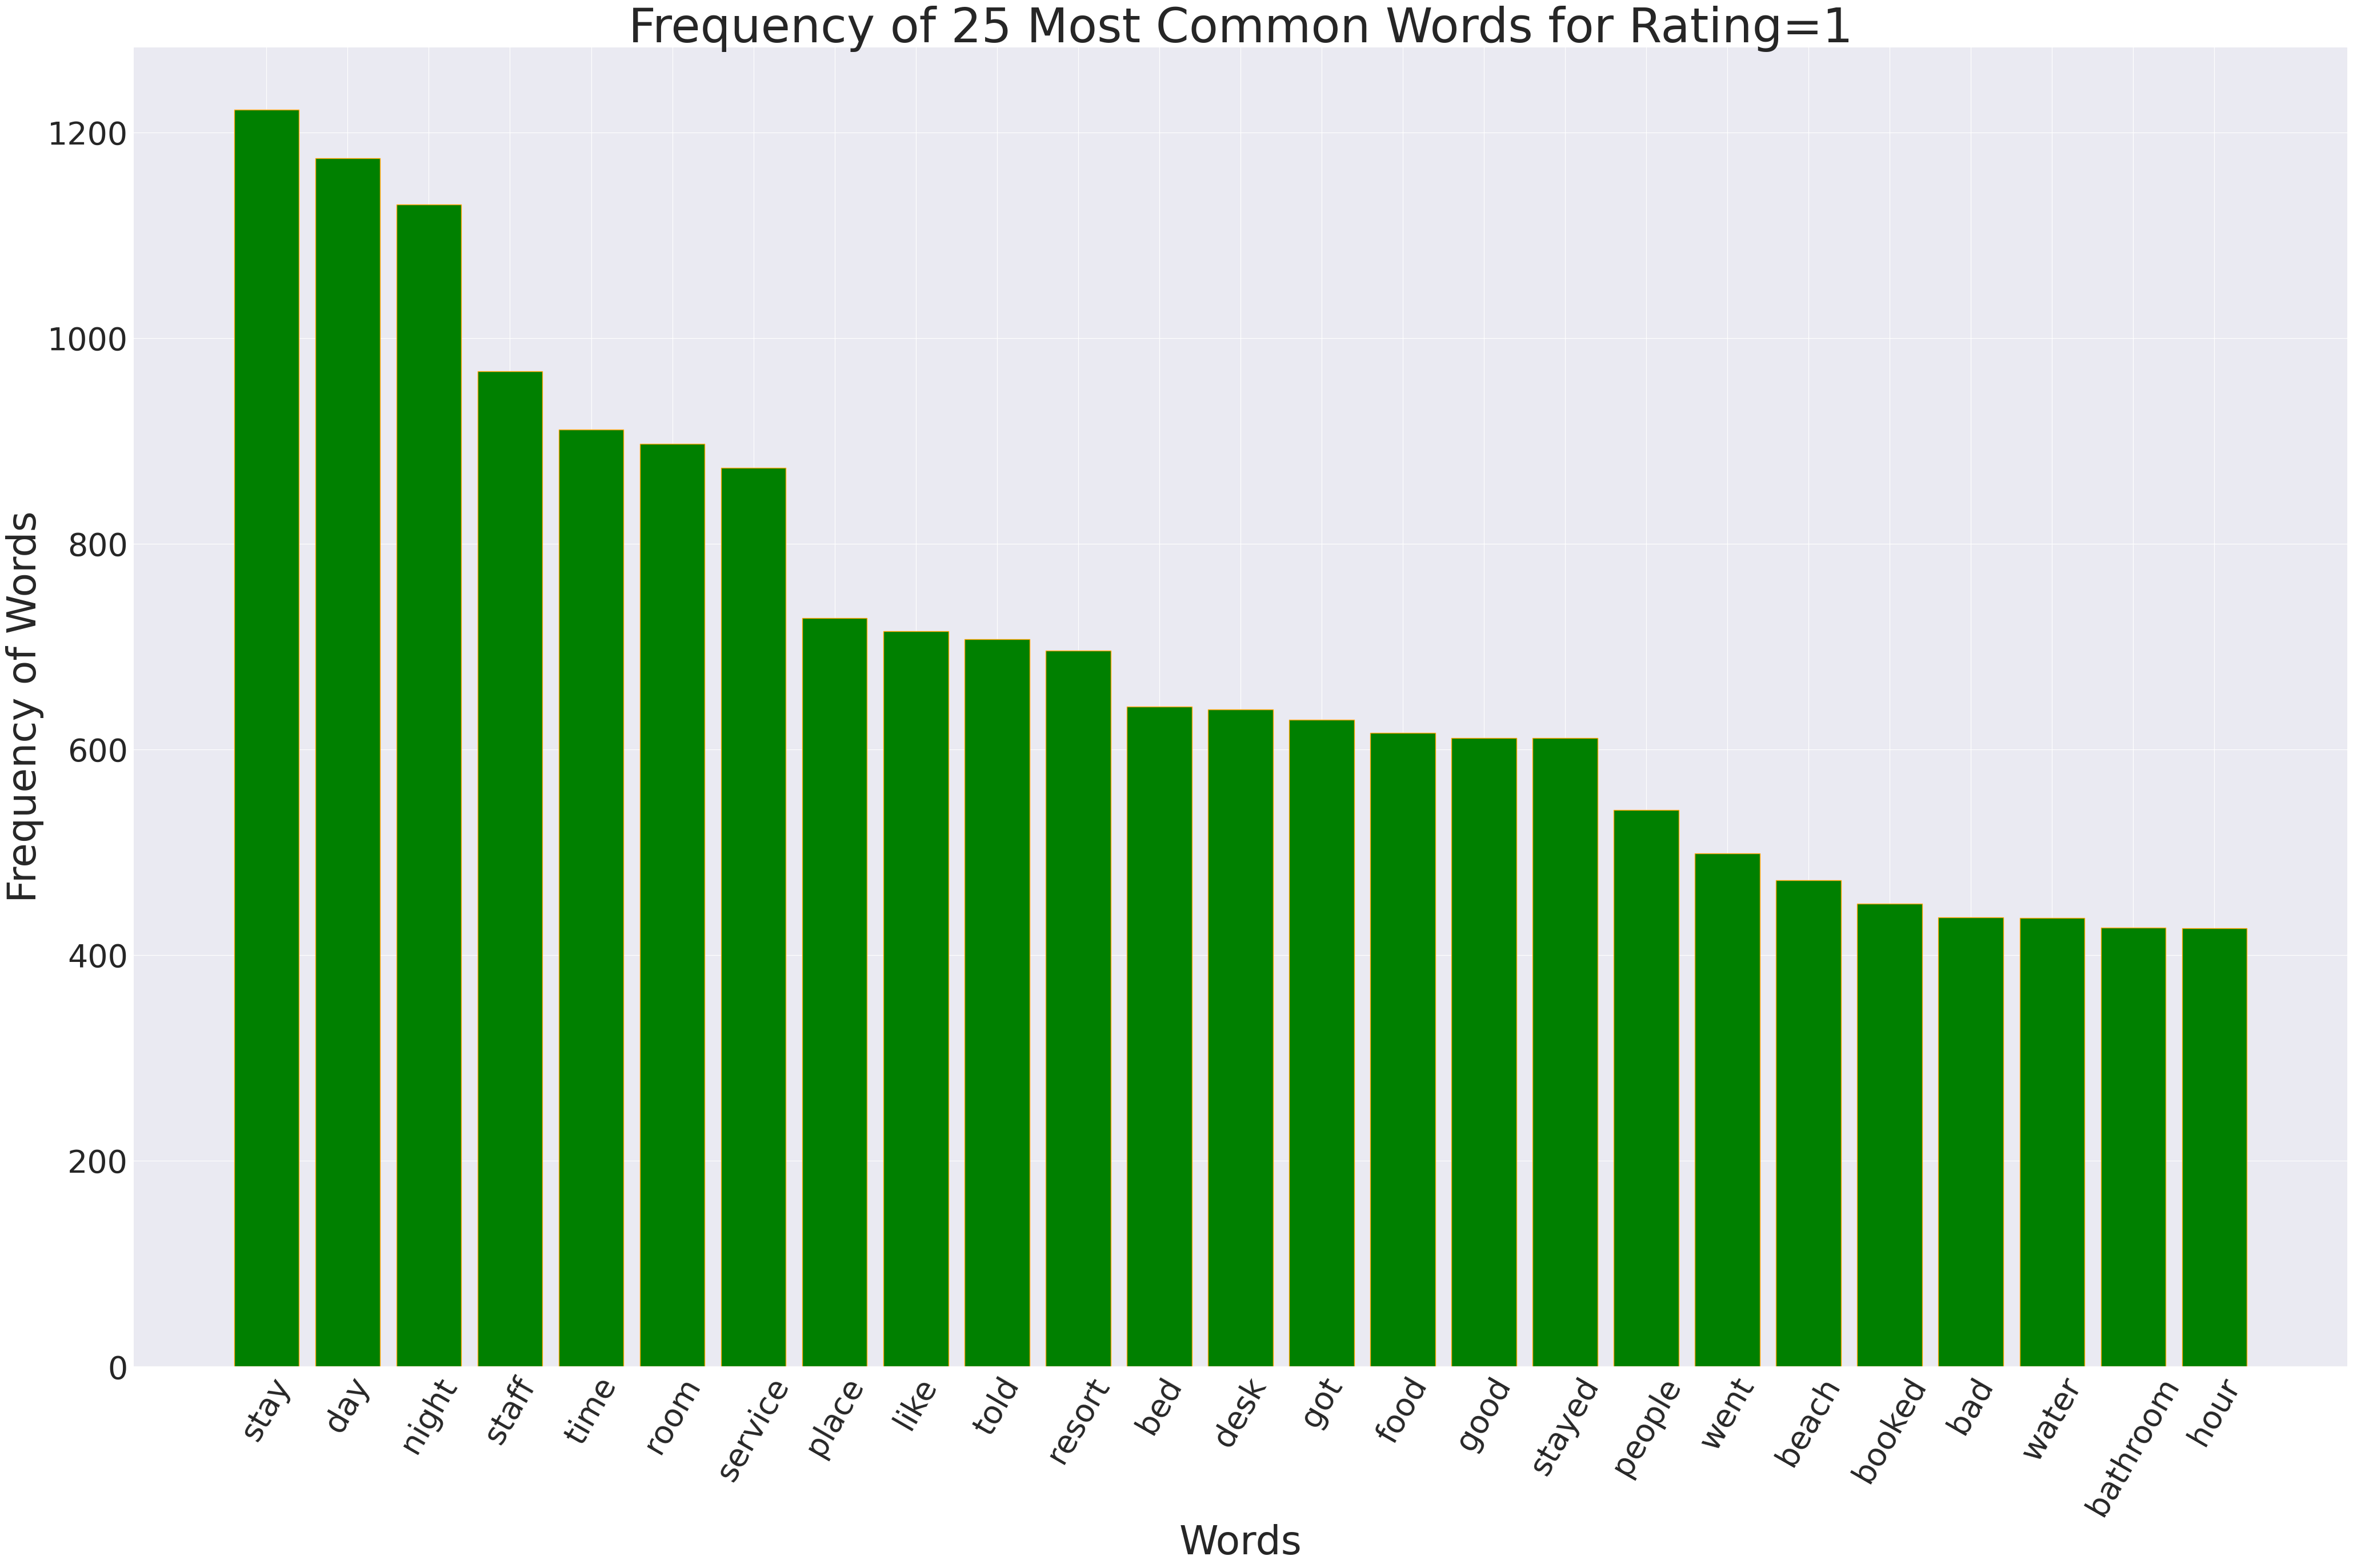

In [ ]:
#Most frequent words for rating 1
group_by = df.groupby('Rating')['Cleaned_Review_Lemmatized'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()


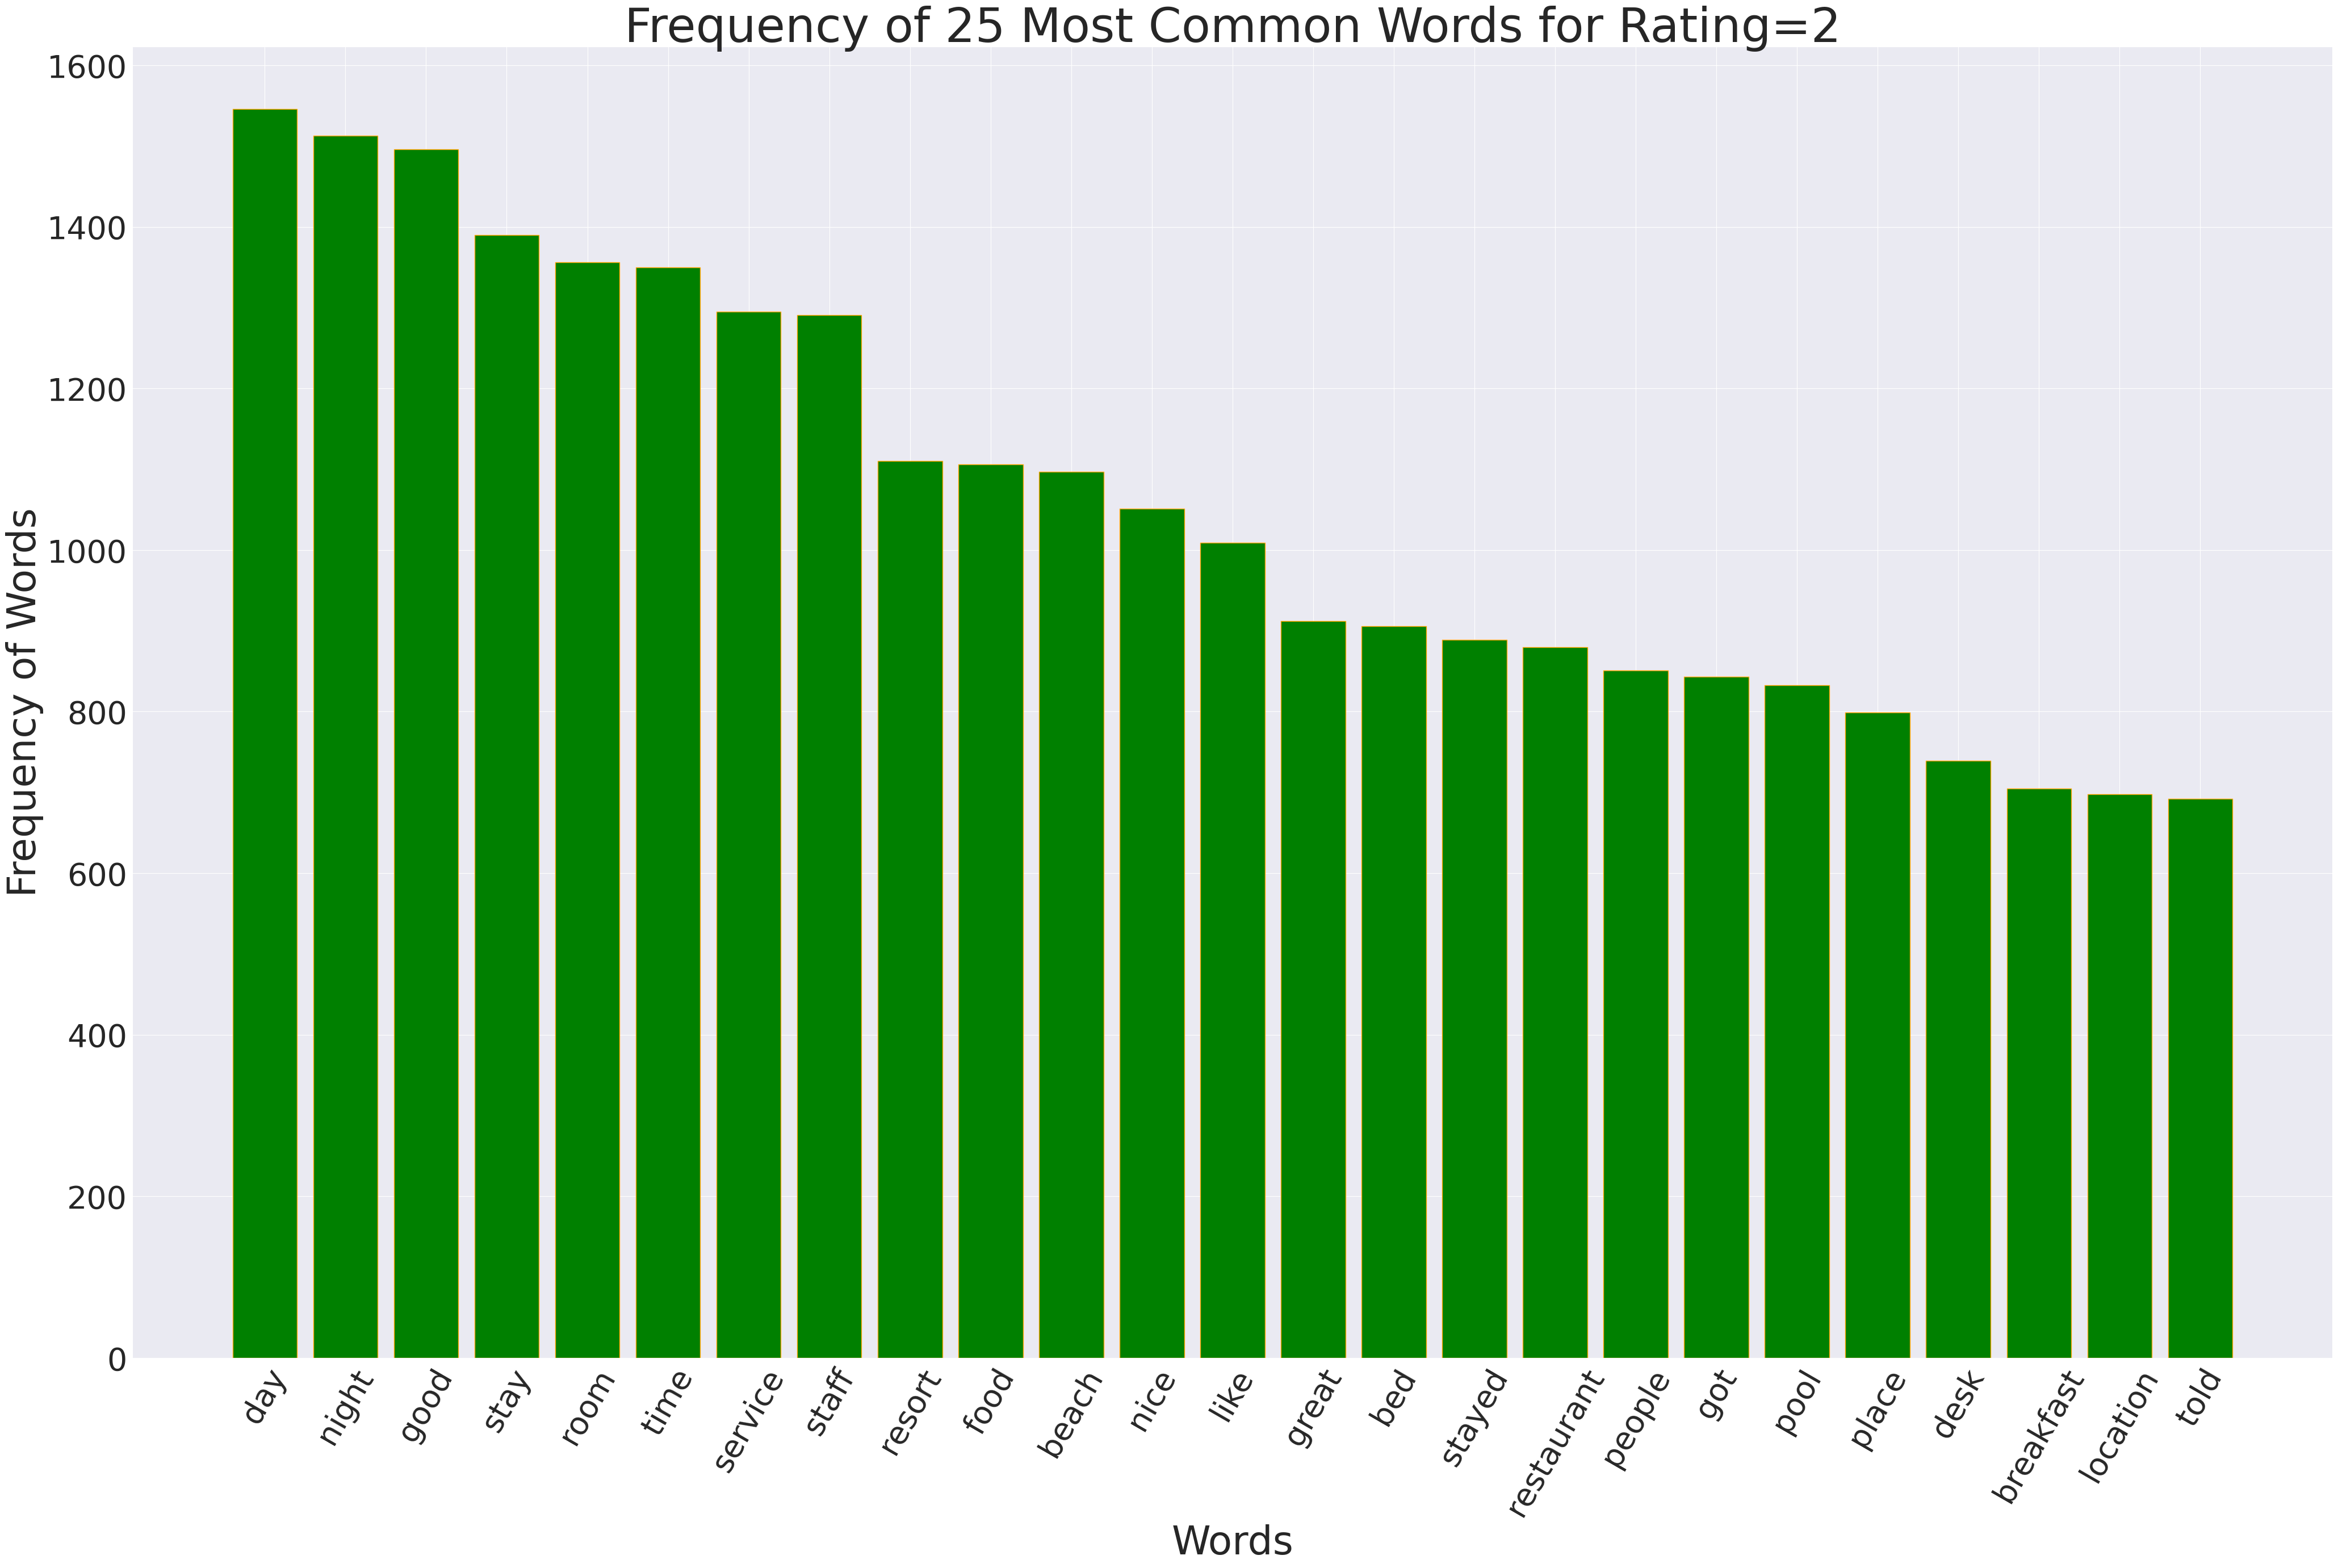

In [ ]:
#Most frequent words for rating 2
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()



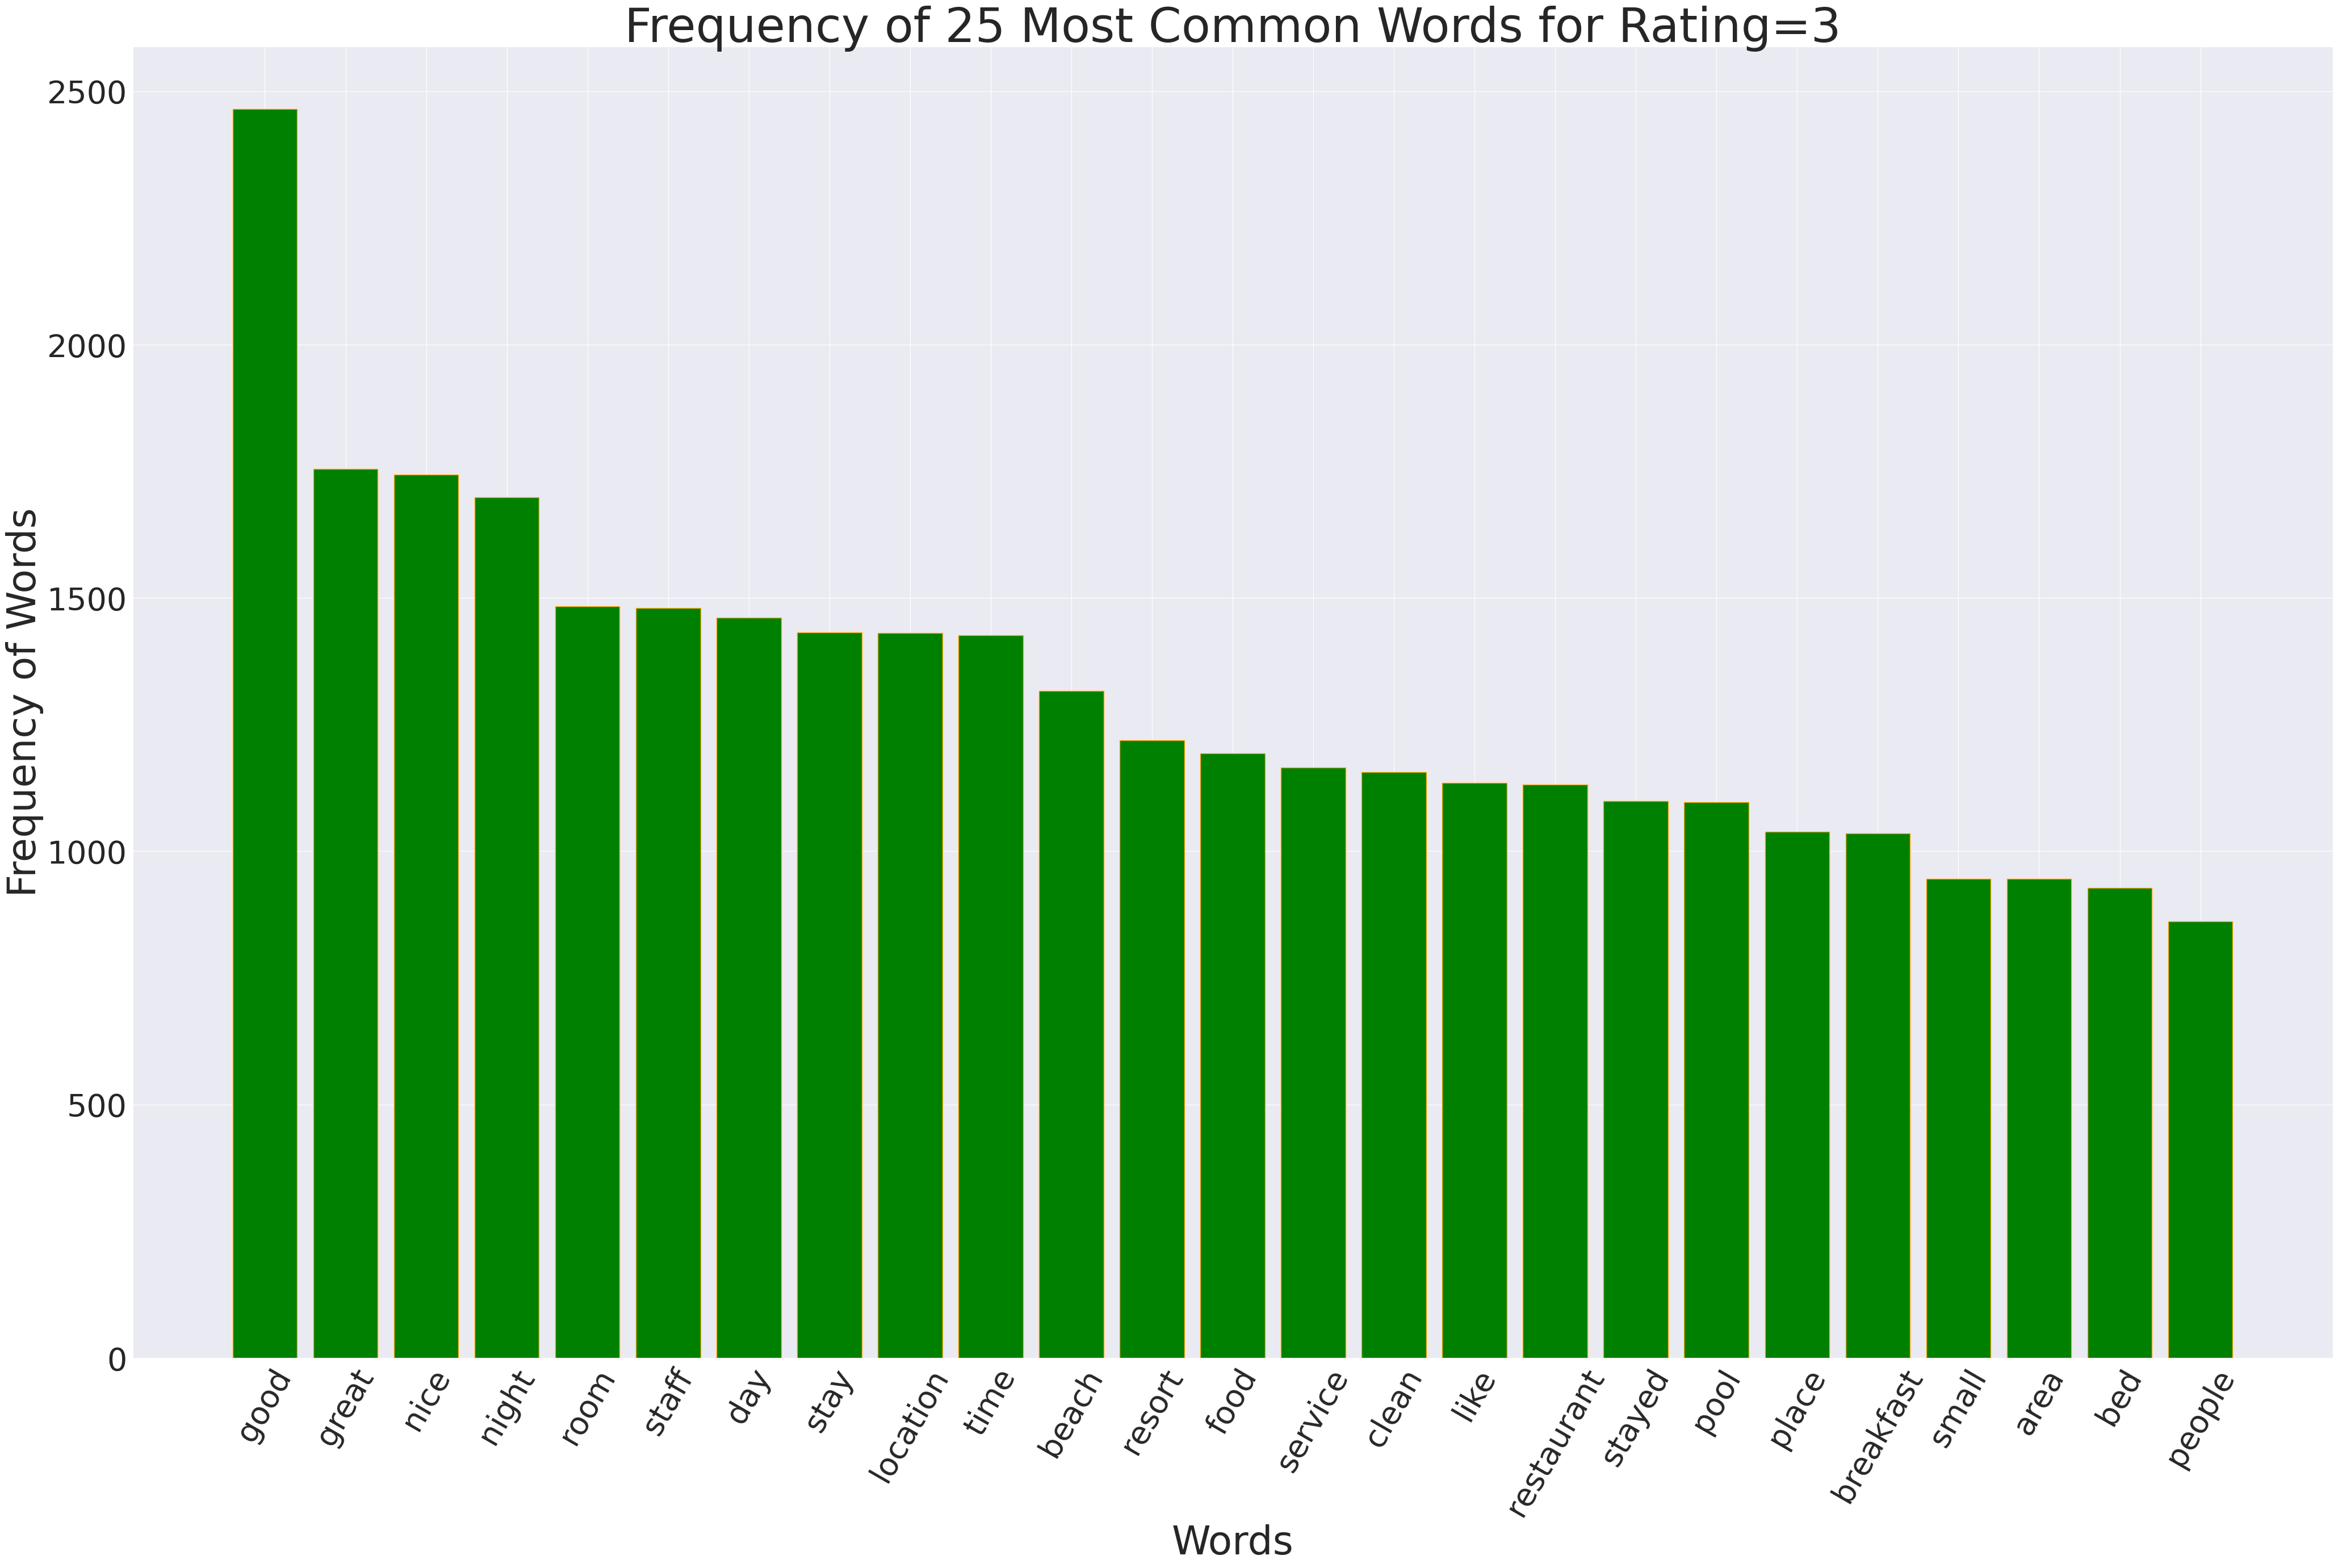

In [ ]:
#Most frequent words for rating 3
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()



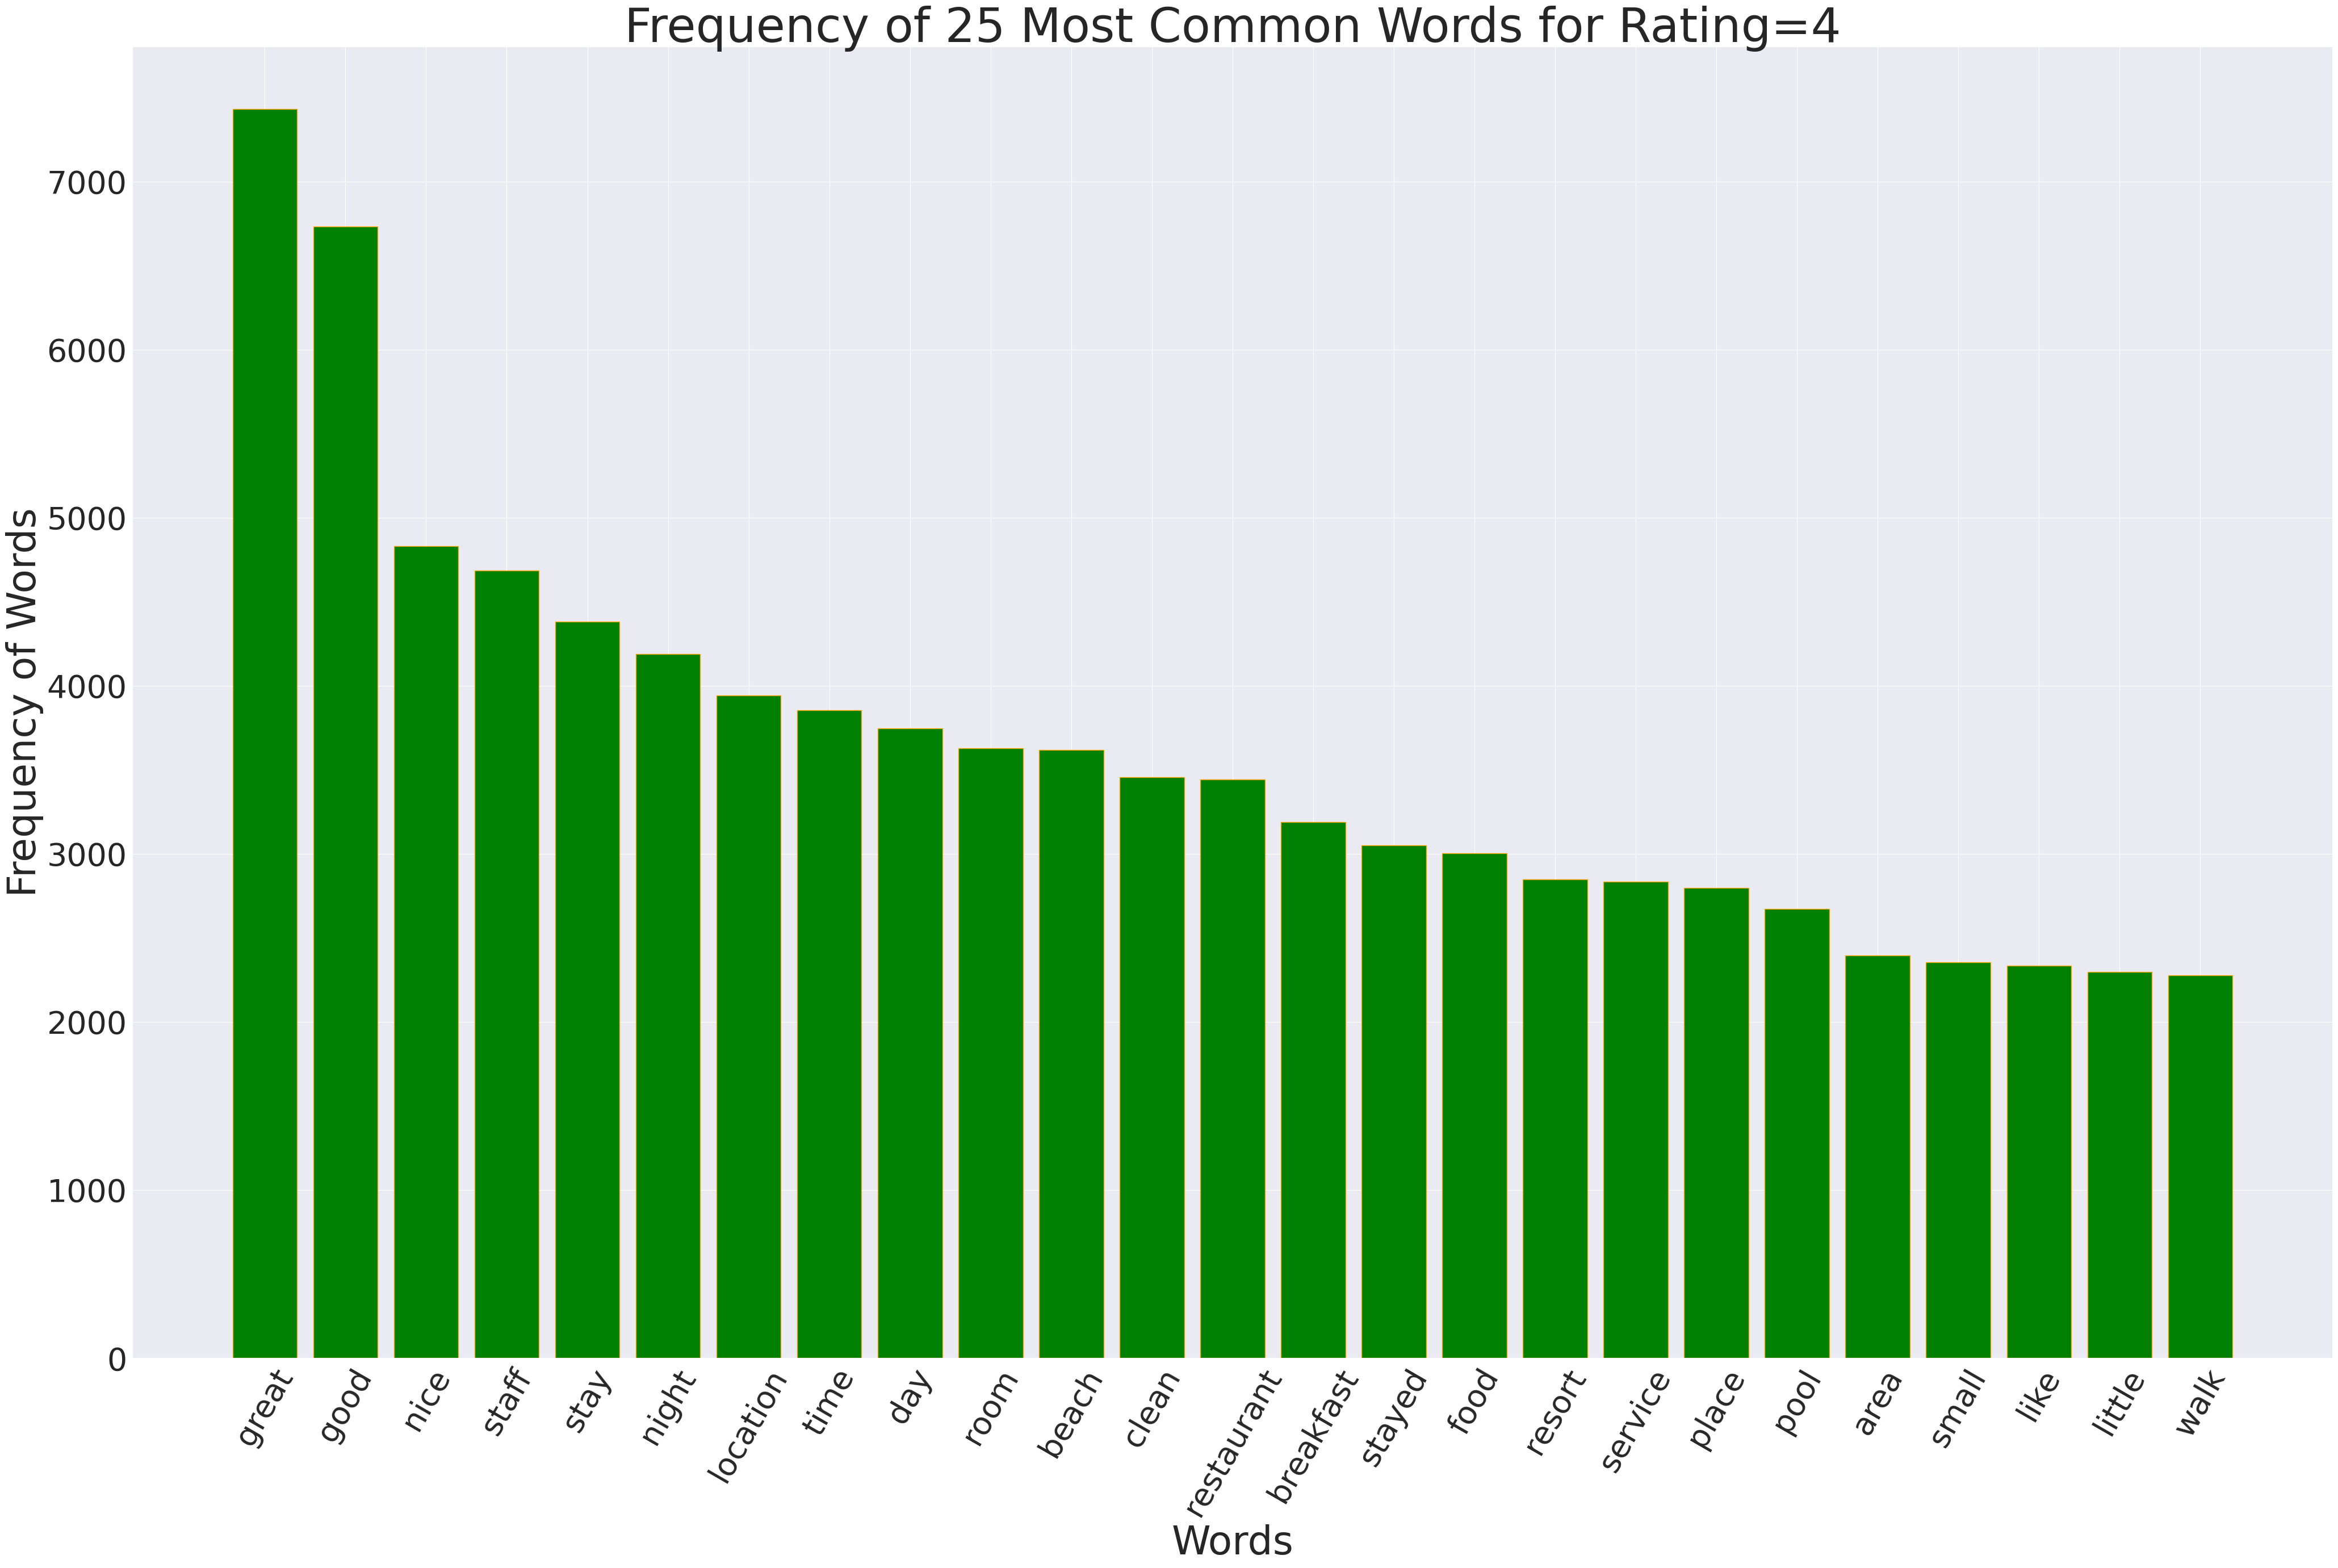

In [ ]:
#Most frequent words for rating 4
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()


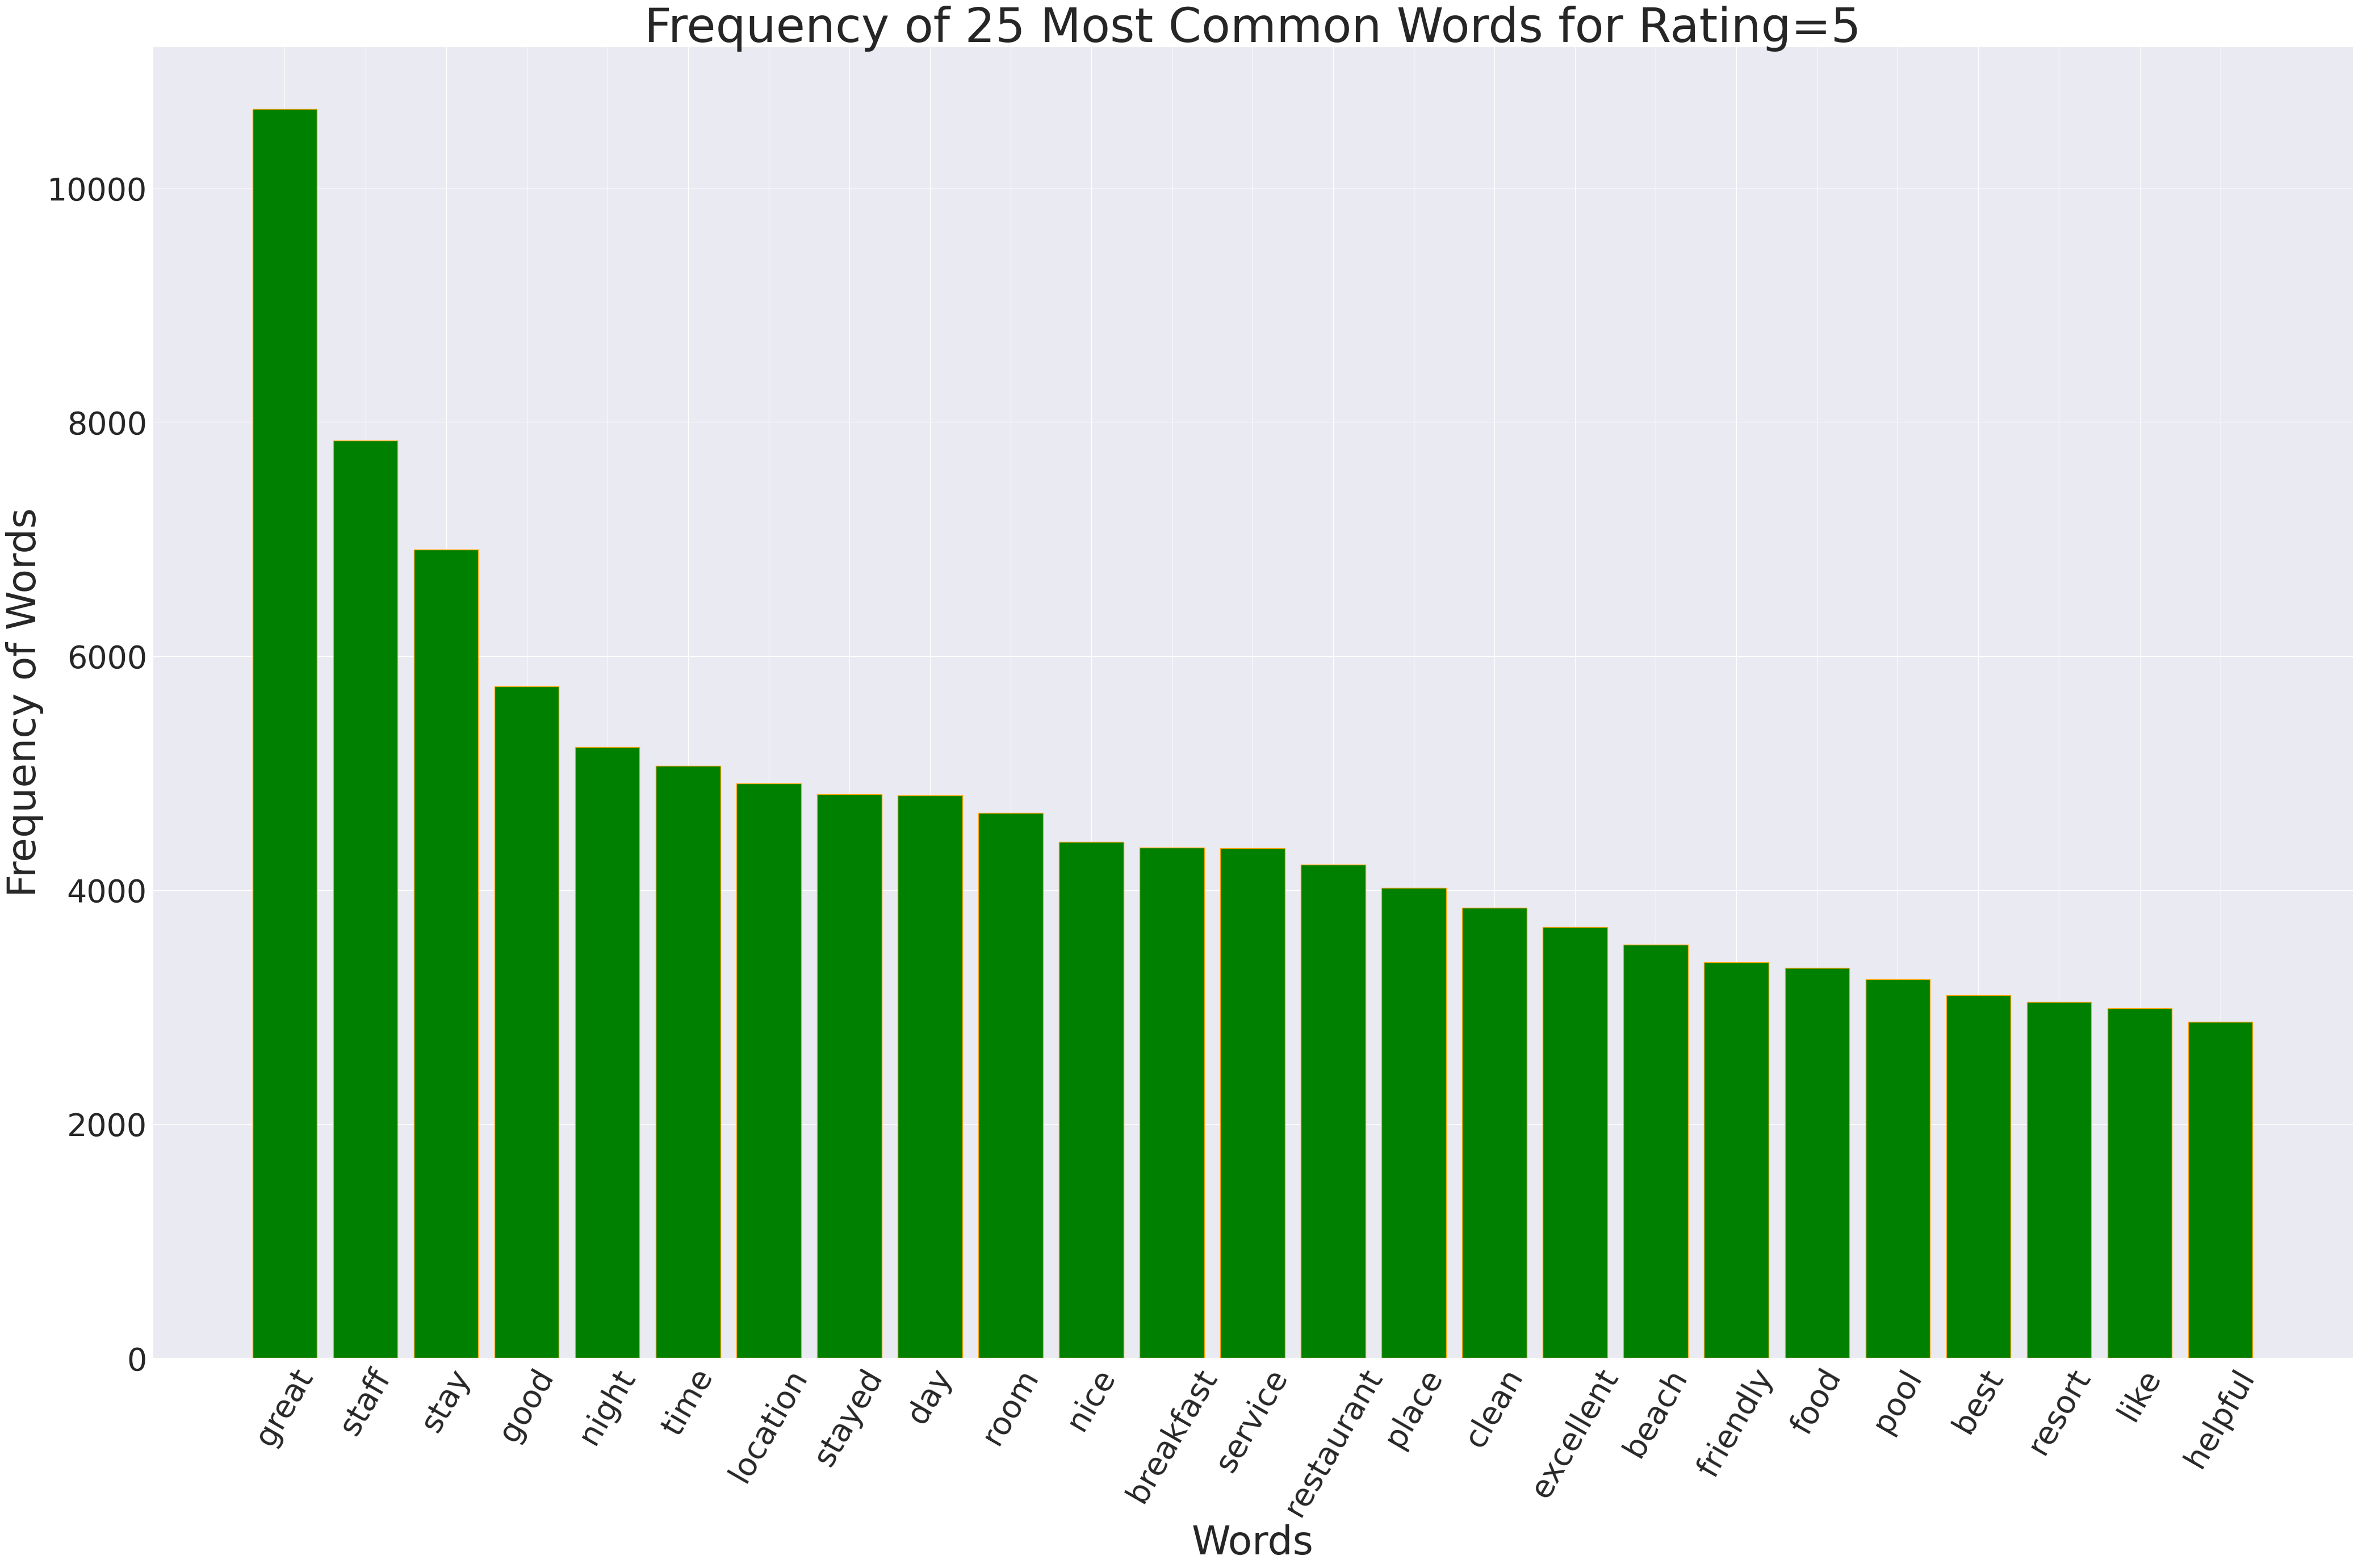

In [ ]:
#Most frequent words for rating 5
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()



In [ ]:
from pprint import pprint


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [ ]:
# spacy for lemmatization
import spacy



In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.5

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df["Cleaned_Review_Lemmatized"]))

print(data_words)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod)


FrozenPhrases<2299 phrases, min_count=5, threshold=100>


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_words_nostops = remove_stopwords(data_words)


In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [ ]:
import spacy
spacy.cli.download("en_core_web_sm")




✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()



In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [ ]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['nice', 'expensive', 'parking', 'get', 'good', 'deal', 'stay', 'anniversary', 'arrive', 'late', 'evening', 'take', 'advice', 'previous', 'review', 'valet_parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'wake', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'hear', 'music', 'night', 'morning', 'door', 'opening_close', 'hear', 'people', 'talk', 'hallway', 'maybe', 'noisy', 'product', 'nice', 'stay', 'nice', 'touch', 'take', 'advantage', 'stay', 'long', 'location', 'great', 'walking_distance', 'shop', 'overall', 'nice', 'experience', 'pay', 'parking', 'night']]


In [ ]:
# View
print(corpus[:1])


['nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)



In [ ]:
# Create Corpus
texts = data_lemmatized



In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 5), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]





[(0,
  '0.025*"check" + 0.025*"ask" + 0.020*"tell" + 0.018*"say" + 0.018*"arrive" + '
  '0.017*"desk" + 0.015*"book" + 0.014*"give" + 0.013*"leave" + 0.012*"door"'),
 (1,
  '0.058*"block" + 0.047*"window" + 0.040*"entertainment" + 0.030*"parking" + '
  '0.019*"mini" + 0.018*"subway" + 0.017*"luxury" + 0.013*"royal" + '
  '0.013*"courtyard" + 0.013*"cafe"'),
 (2,
  '0.063*"stay" + 0.047*"great" + 0.033*"staff" + 0.027*"room" + '
  '0.023*"location" + 0.023*"good" + 0.023*"breakfast" + 0.022*"clean" + '
  '0.020*"night" + 0.018*"walk"'),
 (3,
  '0.047*"service" + 0.030*"restaurant" + 0.029*"beautiful" + 0.023*"love" + '
  '0.020*"enjoy" + 0.019*"wonderful" + 0.019*"return" + 0.015*"perfect" + '
  '0.014*"dinner" + 0.013*"amazing"'),
 (4,
  '0.023*"day" + 0.022*"time" + 0.021*"good" + 0.015*"go" + 0.012*"get" + '
  '0.012*"people" + 0.012*"want" + 0.011*"bar" + 0.011*"place" + '
  '0.010*"little"'),
 (5,
  '0.092*"pool" + 0.091*"resort" + 0.088*"beach" + 0.047*"food" + '
  '0.030*"water" 

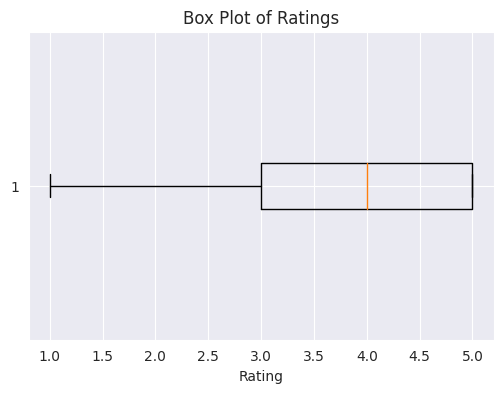

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.boxplot(df['Rating'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] > 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <-0.05:
       return 'Negative'
    else:
       return 'Neutral'

overall_sentiments = df['Review'].apply(get_sentiment)
sentiment_counts=overall_sentiments.value_counts()


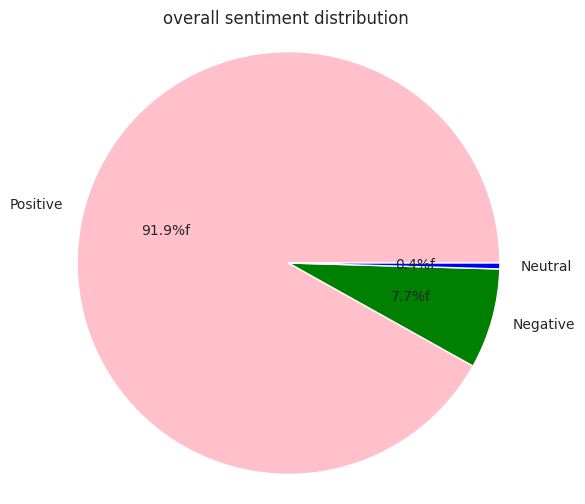

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts,labels=sentiment_counts.index, autopct='%1.1f%%f', colors=['pink','green','blue'])
plt.title('overall sentiment distribution ')
plt.axis('equal')
plt.show()

In [ ]:
grouped_df = df.groupby('Rating')
sid = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] > 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <-0.05:
       return 'Negative'
    else:
       return 'Neutral'
for Rating_no,group in grouped_df:
    Rating_sentiments=group['Review'].apply(get_sentiment)
    sentiment_counts=Rating_sentiments.value_counts()
    print(f"sentiment Analysis for {Rating_no} Rating:")
    print(sentiment_counts)
    print("\n")



sentiment Analysis for 1 Rating:
Negative    817
Positive    579
Neutral      25
Name: Review, dtype: int64


sentiment Analysis for 2 Rating:
Positive    1269
Negative     487
Neutral       37
Name: Review, dtype: int64


sentiment Analysis for 3 Rating:
Positive    2004
Negative     167
Neutral       13
Name: Review, dtype: int64


sentiment Analysis for 4 Rating:
Positive    5975
Negative      55
Neutral        9
Name: Review, dtype: int64


sentiment Analysis for 5 Rating:
Positive    9003
Negative      43
Neutral        8
Name: Review, dtype: int64




In [ ]:
#Cleaning of texts ie punctuations,special characters,numerical values ,lowering of letters
def text_clean(text):
    text=text.lower()

    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)

    return text


In [ ]:
#Applying function to dataset
cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))



In [ ]:
#Performing lemmatization


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]


corpus=[]



for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])

    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)


corpus[6]

df["Cleaned_Review_Lemmatized"]=corpus


#Polarity and subjectivity#
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

pos = [5,4,3]
neg = [1]
neu=[2]

def sentiment(rating):
  if rating in pos:
    return "positive"
  elif rating in neg:
    return "negative"
  elif rating in neu:
      return "neutral"

df['Sentiment'] = df['Rating'].apply(sentiment)




#Model Building


In [ ]:


import pandas as pd
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#Splitting data into test and train#



In [ ]:
#Applying TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(corpus)
y = df['Sentiment']

In [ ]:
#Splitting Data into Training and Testing Set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16392, 10000)
(16392,)
(4099, 10000)
(4099,)


# Model Training...
# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

review_classifier_model=MultinomialNB()
review_classifier_model.fit(X_train,y_train)
review_classifier_model.score(X_test,y_test)

0.8624054647474994

In [ ]:
print(classification_report(y_test,review_classifier_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.85      0.22      0.35       275
     neutral       0.52      0.05      0.09       362
    positive       0.87      1.00      0.93      3462

    accuracy                           0.86      4099
   macro avg       0.74      0.42      0.45      4099
weighted avg       0.83      0.86      0.81      4099



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8953403269090022

In [ ]:
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.80      0.59      0.68       275
     neutral       0.53      0.22      0.31       362
    positive       0.92      0.99      0.95      3462

    accuracy                           0.90      4099
   macro avg       0.75      0.60      0.65      4099
weighted avg       0.87      0.90      0.88      4099



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_model.score(X_test,y_test)

0.8258111734569408

In [ ]:
print(classification_report(y_test,dt_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.43      0.39      0.41       275
     neutral       0.22      0.18      0.20       362
    positive       0.90      0.93      0.92      3462

    accuracy                           0.83      4099
   macro avg       0.52      0.50      0.51      4099
weighted avg       0.81      0.83      0.82      4099



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.86069773115394

In [ ]:
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.88      0.25      0.39       275
     neutral       1.00      0.00      0.01       362
    positive       0.86      1.00      0.92      3462

    accuracy                           0.86      4099
   macro avg       0.91      0.42      0.44      4099
weighted avg       0.87      0.86      0.81      4099



# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_model.score(X_test,y_test)

0.8787509148572823

In [ ]:
print(classification_report(y_test,ada_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.65      0.52      0.58       275
     neutral       0.45      0.14      0.21       362
    positive       0.91      0.98      0.94      3462

    accuracy                           0.88      4099
   macro avg       0.67      0.55      0.58      4099
weighted avg       0.85      0.88      0.85      4099



In [ ]:
pip install LightGBM

In [ ]:
pip install --upgrade pandas dask lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
  Attempting uninstall: dask
    Found existing installation: dask 2023.8.1
    Uninstalling dask-2023.8.1:
      Successfully uninstalled dask-2023.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires dask==2023.8.1, but you have dask 2023.10.0 which is incompatible.


# LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_model.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.738154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359582
[LightGBM] [Info] Number of data points in the train set: 16392, number of used features: 9714
[LightGBM] [Info] Start training from score -2.660516
[LightGBM] [Info] Start training from score -2.438420
[LightGBM] [Info] Start training from score -0.171038


0.8909490119541351

In [ ]:
print(classification_report(y_test,lgb_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.71      0.56      0.63       275
     neutral       0.46      0.26      0.33       362
    positive       0.93      0.98      0.95      3462

    accuracy                           0.89      4099
   macro avg       0.70      0.60      0.64      4099
weighted avg       0.87      0.89      0.88      4099



SVM


In [ ]:
classifier_SVM=SVC()
classifier_SVM.fit(X_train,y_train)
pred_SVM_train=classifier_SVM.predict(X_train)
np.mean(pred_SVM_train==y_train)
pred_SVM_test=classifier_SVM.predict(X_test)
np.mean(pred_SVM_test==y_test)



0.8911929738960722

In [ ]:
print(classification_report(y_test,classifier_SVM.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.81      0.57      0.67       275
     neutral       0.50      0.15      0.23       362
    positive       0.91      0.99      0.95      3462

    accuracy                           0.89      4099
   macro avg       0.74      0.57      0.62      4099
weighted avg       0.86      0.89      0.87      4099



KNeighbors

In [ ]:
classifier_KNN=KNeighborsClassifier()
classifier_KNN.fit(X_train,y_train)
pred_KNN_train=classifier_KNN.predict(X_train)
np.mean(pred_KNN_train==y_train)
pred_KNN_test=classifier_KNN.predict(X_test)
np.mean(pred_KNN_test==y_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x792fe5cf7130>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


0.8567943400829471

In [ ]:
print(classification_report(y_test,classifier_KNN.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.50      0.36      0.42       275
     neutral       0.31      0.10      0.15       362
    positive       0.89      0.98      0.93      3462

    accuracy                           0.86      4099
   macro avg       0.57      0.48      0.50      4099
weighted avg       0.81      0.86      0.83      4099



# Prediction and Accuracy


In [ ]:
y_pred = lr_model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.59      0.80      0.68       203
     neutral       0.22      0.53      0.31       154
    positive       0.99      0.92      0.95      3742

    accuracy                           0.90      4099
   macro avg       0.60      0.75      0.65      4099
weighted avg       0.94      0.90      0.91      4099

Accuracy of Logistic Regression Model: 89.53403269090022%


Text(0.5, 1.0, 'Confusion Matrix for lr Model')

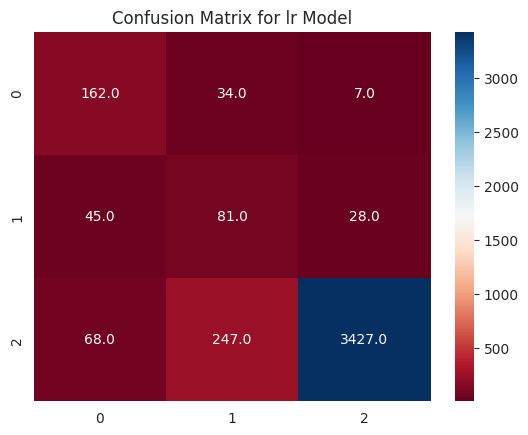

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(report)
cm = confusion_matrix(y_pred, y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of Logistic Regression Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for lr Model")

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier_SVM, open(filename,'wb'))

NameError: ignored